# Customer Churn Analysis


# The story Behind The Data
A bank is concerned that more and more customers are leaving its credit card services. They would really appreciate if someone could analyze it for them, in order to understand the main reasons for leaving the services, and to come up with recommendations for how the bank can mitigate that. Eventually, the bank would like to proactively implement these recommendations in order to keep their customers happy.



# Data Description
In this task, few datasets are provided:

1. **`BankChurners.csv`**   - this file contains basic information about each client (10 columns). The columns are:
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account;
    - `Attrition Flag` - Internal event (customer activity) variable - if the client had churned (attrited) or not (existing).
    - `Dependent Count` - Demographic variable - Number of dependents
    - `Card_Category` - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
    - `Months_on_book` - Period of relationship with bank
    - `Months_Inactive_12_mon` - No. of months inactive in the last 12 months
    - `Contacts_Count_12_mon` - No. of Contacts in the last 12 months
    - `Credit_Limit` - Credit Limit on the Credit Card
    - `Avg_Open_To_Buy` - Open to Buy Credit Line (Average of last 12 months)
    - `Avg_Utilization_Ratio` - Average Card Utilization Ratio
2. **`basic_client_info.csv`** - this file contains some basic client info per each client (6 columns) -
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account
    - `Customer Age` - Demographic variable - Customer's Age in Years
    - `Gender` - Demographic variable - M=Male, F=Female
    - `Education_Level` - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.`
    - `Marital_Status` - Demographic variable - Married, Single, Divorced, Unknown
    - `Income_Category` - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
3. **`enriched_churn_data.csv`** - this file contains some enriched data about each client (7 columns) -
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account
    - `Total_Relationship_Count` - Total no. of products held by the customer
    - `Total_Revolving_Bal` - Total Revolving Balance on the Credit Card
    - `Total_Amt_Chng_Q4_Q1` - Change in Transaction Amount (Q4 over Q1)
    - `Total_Trans_Amt` - Total Transaction Amount (Last 12 months)
    - `Total_Trans_Ct` - Total Transaction Count (Last 12 months)
    - `Total_Ct_Chng_Q4_Q1` - Change in Transaction Count (Q4 over Q1)

# SQL tasks

1. How many clients does the bank have and are above the age of 50?
2. What’s the distribution (in %) between male and female clients?
3. Let’s define a new variable called `age_group`:
    - 10 < x ≤ 30
    - 30 < x ≤ 40
    - 40 < x ≤ 50
    - 50 < x ≤ 60
    - 60 <x ≤ 120
    
    Per each `age_group`, `marital_status` and `income_category`, find out the following values:
    
    a. Churn_rate (in %)
    
    b. Average `Total_Relationship_Count`
    
    c. Minimum value of `Total_Amt_Chng_Q4_Q1`
    
    d. Count of customers
    
    Make sure to order the data by the number of customers in a descending order***
    
4. Out of the male clients, who holds the “blue” card, how many (in %) hold the income category 40K - 60K?

5. Without the usage of group by at all, find the 3rd and 4th highest client IDs (`CLIENTNUM`’s) of `Total_Amt_Chng_Q4_Q1`?

6. We’re interested in knowing which client (CLIENTNUM) has the 2nd highest `Total_Trans_Amt`, Per each `Marital_Status`. 

The bank will create a dedicated campaign and target these specific clients moving forward. In this step, help the bank find these clients.

In order to start writing and running SQL queries here in Workspace, you have a SQL type cell. New cell can be added by clicking on "Add SQL". Masterschool hosts a Postgres DB with all Capstone project datasets. To connect to MS server you need to choose relevant integration. Choose according to the dataset you explore. 

## **1.How many clients does the bank have and are above the age of 50?**

In [1]:
SELECT COUNT(clientnum) AS clients_over_50_count
FROM basic_client_info
WHERE customer_age > 50


,clients_over_50_count
0,3078


## **2. What’s the distribution (in %) between male and female clients?**

In [2]:
with cte (male_count, female_count, total) AS
    (SELECT
        count(CASE WHEN gender = 'M' THEN 1 else NULL END) as male_count,
        count(CASE WHEN gender = 'F' THEN 1 else NULL END) as female_count,
        count(gender) as total
     FROM basic_client_info
    )
select ROUND(sum(male_count)/sum(total)*100,2) as male_pct, ROUND(sum(female_count)/sum(total)*100,2) as female_pct
FROM cte

,male_pct,female_pct
0,47.09,52.91


In [1]:
SELECT count(attrition_flag)
FROM bankchurners
WHERE attrition_flag = 'Attrited Customer'

,count
0,1627


## **3. Per each age_group, marital_status and income_category, find out the following values:
## 
## a. Churn_rate (in %)
## 
## b. Average Total_Relationship_Count
## 
## c. Minimum value of Total_Amt_Chng_Q4_Q1
## 
## d. Count of customers

## The code below is the code for all of question 3

In [4]:
WITH age_group as (
    SELECT clientnum,customer_age, 
    CASE WHEN customer_age BETWEEN 10 and 30 THEN  '10-30'
     WHEN customer_age BETWEEN 31 and 40 THEN  '31-40'
     WHEN customer_age BETWEEN 41 and 50 THEN  '41-50'
     WHEN customer_age BETWEEN 51 and 60 THEN  '51-60'
     WHEN customer_age > 61 THEN '61-120'
     END as age_groups
    FROM basic_client_info),
churn as 
    (SELECT
        clientnum,
        count(CASE WHEN attrition_flag = 'Attrited Customer' THEN 1 ELSE NULL END) AS churned,
        count(CASE WHEN attrition_flag = 'Existing Customer' THEN 1 ELSE NULL END) as current,
        count(attrition_flag) as total
    FROM bankchurners
    group by clientnum)

SELECT COUNT(client.clientnum) AS customer_count,
ROUND(sum(churned)/sum(total)*100,2) as churn_pct,
ROUND(AVG(ecd.total_relationship_count),2) AS Average_total_relationship_count,
MIN(ecd.total_amt_chng_q4_q1) AS min_total_amt_chng_q4_q1, client.income_category,
client.marital_status,
ag.age_groups
FROM churn c
JOIN age_group ag on ag.clientnum = c.clientnum
JOIN basic_client_info client on client.clientnum = ag.clientnum
JOIN enriched_churn_data ecd on client.clientnum = ecd.clientnum
group by client.income_category, client.marital_status, ag.age_groups
ORDER BY customer_count desc

,customer_count,churn_pct,average_total_relationship_count,min_total_amt_chng_q4_q1,income_category,marital_status,age_groups
0,735,18.64,3.76,0.061,Less than $40K,Married,41-50
1,557,17.77,3.72,0.275,Less than $40K,Single,41-50
2,453,15.45,3.91,0.046,Less than $40K,Married,51-60
3,388,19.07,3.64,0.241,Less than $40K,Single,51-60
4,366,19.13,3.79,0.196,$40K - $60K,Married,41-50
...,...,...,...,...,...,...,...
129,1,0.00,6.00,0.731,$80K - $120K,Unknown,None
130,1,0.00,4.00,1.234,Unknown,Unknown,None
131,1,0.00,3.00,0.628,Unknown,Unknown,61-120
132,1,0.00,5.00,0.464,Less than $40K,Unknown,None


## **4.Out of the male clients, who holds the “blue” card, how many (in %) hold the income category 40K - 60K?**

In [22]:
WITH cte AS (
    SELECT clientnum,
    COUNT(CASE WHEN income_category = '$40K - $60K' THEN 1 ELSE NULL END) AS sub,
    COUNT(clientnum) as total
    FROM basic_client_info
    GROUP BY clientnum
    )

SELECT sum(cte.sub)/sum(cte.total)*100 AS blue_cust_count_pct
FROM basic_client_info client
JOIN bankchurners b ON b.clientnum = client.clientnum
JOIN cte ON cte.clientnum = b.clientnum
WHERE client.gender = 'M' AND b.card_category = 'Blue'
order by blue_cust_count_pct




,blue_cust_count_pct
0,16.493656


## **5.Without the usage of group by at all, find the 3rd and 4th highest client IDs (CLIENTNUM’s) of Total_Amt_Chng_Q4_Q1?**

In [23]:
SELECT clientnum, total_amt_chng_q4_q1
FROM enriched_churn_data
ORDER BY clientnum DESC
LIMIT 2 OFFSET 3 

,clientnum,total_amt_chng_q4_q1
0,828291858,0.630
1,828288333,0.938


## **6.We’re interested in knowing which client (CLIENTNUM) has the 2nd highest Total_Trans_Amt, Per each Marital_Status.**

In [24]:
WITH CTE AS (SELECT c.clientnum,
       ecd.total_trans_amt,
       c.marital_status,
       row_number() OVER (PARTITION BY c.marital_status ORDER BY ecd.total_trans_amt DESC ) as row
FROM
    basic_client_info c 
    JOIN enriched_churn_data ecd ON ecd.clientnum = c.clientnum)
    
SELECT * 
FROM CTE
WHERE row = 2
    
    
    
       

,clientnum,total_trans_amt,marital_status,row
0,716894658,16824,Divorced,2
1,717642633,17995,Married,2
2,716004258,17634,Single,2
3,719848008,16098,Unknown,2


## Tableau Tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualizations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - Total number of clients
    - Churn rate %
    - Average transaction amount per customer
    - Average transaction amount before churn
    - etc.
2. **Churn rate %** among different **age groups**. You will need to:
    - Use the Bins function to split client age into age ranges
    - Define Churn rate % as a calculated field
    - Choose the way of visualizing the comparison
3. **A Scatterplot** visualizing certain customer spending behaviors and their connection to the churn if exists. For example, you can compare Total transaction amount and Total transaction count of each client and use color to mark churned and existing customers. 
4. **A Highlight Table** comparing Churn rate % among two demographic dimensions (from *basic_client_info* table), where one is placed on Rows and another on Columns, forming a matrix. 
5. **A Bar Chart** with multiple metrics by Clientnum, where each row represents one Client and has multiple metrics as columns. Add a few filters or parameters to let user drill down into the set of clients they are interested in.
6. **A Pareto Analysis** based on custom defined **customer segment**. 
    - Segment can include values from the demographic information of the client. For example,
        - Gender | Income
        - Gender | Income | Marital status
        - etc.
    - Choose the metric to analyse. For example,
        - Total number of clients (People from which customer segments most often become our clients?)
        - Churn rate absolute (How many churned customers we have in each segment?)
        - Churn rate % (What is the relative churn rate in each customer segment?)
        - etc.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard. For example,
    - to change the metric used in the chart(s)
    - to change the value of a benchmark
8. At least one **more visualization of your choice** adds value to your analysis.

_Use this cell to add your Tableau links. We encourage you also to add here screenshots from your Tableau dashboard with explanations._ https://public.tableau.com/app/profile/thayne.campbell/viz/Capstone2-BankChurnData/Dashboard2?publish=yes

![image](image.png)


![image-3](image-3.png)


_For_ deep dive analysis and EDA follow the guidelines on project [page](https://final-project.super.site/)

In [25]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [26]:
# Loading + let's see the head of each file we have
bank_churners_df = pd.read_csv('bankchurners.csv')
basic_client_info_df = pd.read_csv('basic_client_info.csv')
enriched_churn_df = pd.read_csv('enriched_churn_data.csv')
bank_churners_df.head(3)

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077


In [27]:
basic_client_info_df.head(3)

,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708082083,45,F,High School,Married,Less than $40K
1,708083283,58,M,Unknown,Single,$40K - $60K
2,708084558,46,M,Doctorate,Divorced,$80K - $120K


In [28]:
enriched_churn_df.head(3)

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,828343083,3,1793,0.803,3646,0.659,68
1,828298908,4,2035,0.613,1770,0.741,47
2,828294933,3,2437,0.765,2519,0.565,36


## **Summary Statistics Process**

In [29]:
bank_churners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientnum               10127 non-null  int64  
 1   attrition_flag          10127 non-null  object 
 2   dependent_count         10127 non-null  int64  
 3   card_category           10127 non-null  object 
 4   months_on_book          10127 non-null  int64  
 5   months_inactive_12_mon  10127 non-null  int64  
 6   contacts_count_12_mon   10127 non-null  int64  
 7   credit_limit            10127 non-null  float64
 8   avg_open_to_buy         10127 non-null  float64
 9   avg_utilization_ratio   10127 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 791.3+ KB


# Let's focus on the columns with the int64 datatype first

## **Get a count of the clientnum, representing individual clients. No need to get other numerical statistics on these are they are ID numbers and not statistics**

In [30]:
bank_churners_df['clientnum'].count()

10127

## **Let's get a look at the dependent_count column**

In [31]:
bank_churners_df['dependent_count'].count()

10127

In [32]:
bank_churners_df['dependent_count'].min()


0

In [33]:
bank_churners_df['dependent_count'].max()

5

In [34]:
bank_churners_df['dependent_count'].mean()

2.3462032191172115

In [35]:
bank_churners_df['dependent_count'].median()

2.0

In [36]:
bank_churners_df['dependent_count'].quantile(0.25)

1.0

In [37]:
bank_churners_df['dependent_count'].quantile(0.75)

3.0

In [38]:
bank_churners_df['dependent_count'].isna().sum()

0

## **Next, a look at the months on book column**

In [39]:
bank_churners_df['months_on_book'].count()

10127

In [40]:
bank_churners_df['months_on_book'].min()

13

In [41]:
bank_churners_df['months_on_book'].max()

56

In [42]:
bank_churners_df['months_on_book'].mean()

35.928409203120374

In [43]:
bank_churners_df['months_on_book'].median()

36.0

In [44]:
bank_churners_df['months_on_book'].quantile(0.25)

31.0

In [45]:
bank_churners_df['months_on_book'].quantile(0.75)

40.0

In [46]:
bank_churners_df['months_on_book'].isna().sum()

0

In [47]:
len(pd.unique(bank_churners_df['months_on_book']))

44

## **Next, the months inactive column**

In [48]:
bank_churners_df['months_inactive_12_mon'].count()

10127

In [49]:
bank_churners_df['months_inactive_12_mon'].min()

0

In [50]:
bank_churners_df['months_inactive_12_mon'].max()

6

In [51]:
bank_churners_df['months_inactive_12_mon'].mean()

2.3411671768539546

In [52]:
bank_churners_df['months_inactive_12_mon'].median()

2.0

In [53]:
bank_churners_df['months_inactive_12_mon'].quantile(0.25)

2.0

In [54]:
bank_churners_df['months_inactive_12_mon'].quantile(0.75)

3.0

In [55]:
bank_churners_df['months_inactive_12_mon'].isna().sum()

0

In [56]:
len(pd.unique(bank_churners_df['months_inactive_12_mon']))

7

## **Now the contacts count 12 months column**

In [57]:
bank_churners_df['contacts_count_12_mon'].count()

10127

In [58]:
bank_churners_df['contacts_count_12_mon'].min()

0

In [59]:
bank_churners_df['contacts_count_12_mon'].max()

6

In [60]:
bank_churners_df['contacts_count_12_mon'].mean()

2.4553174681544387

In [61]:
bank_churners_df['contacts_count_12_mon'].median()

2.0

In [62]:
bank_churners_df['contacts_count_12_mon'].quantile(0.25)

2.0

In [63]:
bank_churners_df['contacts_count_12_mon'].quantile(0.75)

3.0

In [64]:
bank_churners_df['contacts_count_12_mon'].isna().sum()

0

In [65]:
len(pd.unique(bank_churners_df['contacts_count_12_mon']))

7

In [66]:
bank_churners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientnum               10127 non-null  int64  
 1   attrition_flag          10127 non-null  object 
 2   dependent_count         10127 non-null  int64  
 3   card_category           10127 non-null  object 
 4   months_on_book          10127 non-null  int64  
 5   months_inactive_12_mon  10127 non-null  int64  
 6   contacts_count_12_mon   10127 non-null  int64  
 7   credit_limit            10127 non-null  float64
 8   avg_open_to_buy         10127 non-null  float64
 9   avg_utilization_ratio   10127 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 791.3+ KB


## Now let's examine the object Dtype columns, starting with 'attrition flag'

In [67]:
bank_churners_df['attrition_flag'].count()

10127

In [68]:
bank_churners_df['attrition_flag'].isna().sum()

0

In [69]:
len(pd.unique(bank_churners_df['attrition_flag']))

2

## Next up is card_category

In [70]:
bank_churners_df['card_category'].count()

10127

In [71]:
bank_churners_df['card_category'].isna().sum()


0

In [72]:
len(pd.unique(bank_churners_df['card_category']))


4

## Now let's examine the float64 columns, starting with credit_limit

In [73]:
bank_churners_df['credit_limit'].count()


10127

In [74]:
bank_churners_df['credit_limit'].min()

1438.3

In [75]:
bank_churners_df['credit_limit'].max()

34516.0

In [76]:
bank_churners_df['credit_limit'].mean()

8631.953698034957

In [77]:
bank_churners_df['credit_limit'].median()

4549.0

In [78]:
bank_churners_df['credit_limit'].quantile(0.25)

2555.0

In [79]:
bank_churners_df['credit_limit'].quantile(0.75)

11067.5

In [80]:
bank_churners_df['credit_limit'].isna().sum()

0

In [81]:
len(pd.unique(bank_churners_df['credit_limit']))

6205

## Now avg_open_to_buy

In [82]:
bank_churners_df['avg_open_to_buy'].count()

10127

In [83]:
bank_churners_df['avg_open_to_buy'].min()

3.0

In [84]:
bank_churners_df['avg_open_to_buy'].max()

34516.0

In [85]:
bank_churners_df['avg_open_to_buy'].mean()

7469.139636614989

In [86]:
bank_churners_df['avg_open_to_buy'].median()

3474.0

**Difference between mean and median here could indicate some outliers. Will examine this further later on**

In [87]:
bank_churners_df['avg_open_to_buy'].quantile(0.25)

1324.5

In [88]:
bank_churners_df['avg_open_to_buy'].quantile(0.75)

9859.0

In [89]:
bank_churners_df['avg_open_to_buy'].isna().sum()

0

In [90]:
len(pd.unique(bank_churners_df['avg_open_to_buy']))

6813

## Lastly, avg_utilization_ratio

In [91]:
bank_churners_df['avg_utilization_ratio'].count()

10127

In [92]:
bank_churners_df['avg_utilization_ratio'].min()

0.0

In [93]:
bank_churners_df['avg_utilization_ratio'].max()

0.999

In [94]:
bank_churners_df['avg_utilization_ratio'].mean()

0.27489355189098447

In [95]:
bank_churners_df['avg_utilization_ratio'].median()

0.176

**Possible outliers. Will examine further**

In [96]:
bank_churners_df['avg_utilization_ratio'].quantile(0.25)

0.023

In [97]:
bank_churners_df['avg_utilization_ratio'].quantile(0.75)

0.503

In [98]:
bank_churners_df['avg_utilization_ratio'].isna().sum()

0

In [99]:
len(pd.unique(bank_churners_df['avg_utilization_ratio']))

964

## Let's move onto the basic_client_info dataframe and perform the same summary statistics

In [100]:
basic_client_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clientnum        10127 non-null  int64 
 1   customer_age     10127 non-null  int64 
 2   gender           10127 non-null  object
 3   education_level  10127 non-null  object
 4   marital_status   10127 non-null  object
 5   income_category  10127 non-null  object
dtypes: int64(2), object(4)
memory usage: 474.8+ KB


In [101]:
basic_client_info_df['clientnum'].count()


10127

In [102]:
basic_client_info_df['clientnum'].isna().sum()

0

In [103]:
len(pd.unique(basic_client_info_df['clientnum']))

10127

## Now the customer age column

In [104]:
basic_client_info_df['customer_age'].count()

10127

In [105]:
basic_client_info_df['customer_age'].min()

26

In [106]:
basic_client_info_df['customer_age'].max()

73

In [107]:
basic_client_info_df['customer_age'].median()

46.0

In [108]:
basic_client_info_df['customer_age'].mean()

46.32596030413745

In [109]:
basic_client_info_df['customer_age'].quantile(0.25)

41.0

In [110]:
basic_client_info_df['customer_age'].quantile(0.75)

52.0

In [111]:
basic_client_info_df['customer_age'].isna().sum()

0

In [112]:
len(pd.unique(basic_client_info_df['customer_age']))

45

## And the gender column

In [113]:
basic_client_info_df['gender'].count()

10127

In [114]:
basic_client_info_df['gender'].isna().sum()

0

In [115]:
len(pd.unique(basic_client_info_df['gender']))

2

## and now the education level column

In [116]:
basic_client_info_df['education_level'].count()

10127

In [117]:
basic_client_info_df['education_level'].isna().sum()

0

In [118]:
len(pd.unique(basic_client_info_df['education_level']))

7

## and the marital status column

In [119]:
basic_client_info_df['marital_status'].count()

10127

In [120]:
basic_client_info_df['marital_status'].isna().sum()

0

In [121]:
len(pd.unique(basic_client_info_df['marital_status']))

4

## and finally the income category column

In [122]:
basic_client_info_df['income_category'].count()

10127

In [123]:
basic_client_info_df['marital_status'].isna().sum()

0

In [124]:
len(pd.unique(basic_client_info_df['marital_status']))

4

## And lastly, the same process on the enriched_churn dataframe

In [125]:
enriched_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   total_relationship_count  10127 non-null  int64  
 2   total_revolving_bal       10127 non-null  int64  
 3   total_amt_chng_q4_q1      10127 non-null  float64
 4   total_trans_amt           10127 non-null  int64  
 5   total_ct_chng_q4_q1       10127 non-null  float64
 6   total_trans_ct            10127 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 553.9 KB


## first column, the clientnum column

In [126]:
enriched_churn_df['clientnum'].count()

10127

In [127]:
enriched_churn_df['clientnum'].isna().sum()

0

In [128]:
len(pd.unique(enriched_churn_df['clientnum']))

10127

## next up, total_relationship_count

In [129]:
enriched_churn_df['total_relationship_count'].count()

10127

In [130]:
enriched_churn_df['total_relationship_count'].min()

1

In [131]:
enriched_churn_df['total_relationship_count'].max()

6

In [132]:
enriched_churn_df['total_relationship_count'].mean()

3.8125802310654686

In [133]:
enriched_churn_df['total_relationship_count'].median()

4.0

In [134]:
enriched_churn_df['total_relationship_count'].quantile(0.25)

3.0

In [135]:
enriched_churn_df['total_relationship_count'].quantile(0.75)

5.0

In [136]:
enriched_churn_df['total_relationship_count'].isna().sum()

0

In [137]:
len(pd.unique(enriched_churn_df['total_relationship_count']))

6

## Then total_revolving_bal column

In [138]:
enriched_churn_df['total_revolving_bal'].count()

10127

In [139]:
enriched_churn_df['total_revolving_bal'].min()

0

In [140]:
enriched_churn_df['total_revolving_bal'].max()

2517

In [141]:
enriched_churn_df['total_revolving_bal'].median()

1276.0

In [142]:
enriched_churn_df['total_revolving_bal'].mean()

1162.8140614199665

In [143]:
enriched_churn_df['total_revolving_bal'].quantile(0.25)

359.0

In [144]:
enriched_churn_df['total_revolving_bal'].quantile(0.75)

1784.0

In [145]:
enriched_churn_df['total_revolving_bal'].isna().sum()

0

In [146]:
len(pd.unique(enriched_churn_df['total_revolving_bal']))

1974

## now for total_amt_chng_q4_q1

In [147]:
enriched_churn_df['total_amt_chng_q4_q1'].count()

10127

In [148]:
enriched_churn_df['total_amt_chng_q4_q1'].min()

0.0

In [149]:
enriched_churn_df['total_amt_chng_q4_q1'].max()

3.397

In [150]:
enriched_churn_df['total_amt_chng_q4_q1'].median()

0.736

In [151]:
enriched_churn_df['total_amt_chng_q4_q1'].mean()

0.7599406536980349

In [152]:
enriched_churn_df['total_amt_chng_q4_q1'].quantile(0.25)

0.631

In [153]:
enriched_churn_df['total_amt_chng_q4_q1'].quantile(0.75)

0.859

In [154]:
enriched_churn_df['total_amt_chng_q4_q1'].isna().sum()

0

In [155]:
len(pd.unique(enriched_churn_df['total_amt_chng_q4_q1']))

1158

## and again for total_trans_amt

In [156]:
enriched_churn_df['total_trans_amt'].count()

10127

In [157]:
enriched_churn_df['total_trans_amt'].min()

510

In [158]:
enriched_churn_df['total_trans_amt'].max()

18484

In [159]:
enriched_churn_df['total_trans_amt'].median()

3899.0

In [160]:
enriched_churn_df['total_trans_amt'].mean()

4404.086303939963

**possible outliers? Will examine further**

In [161]:
enriched_churn_df['total_trans_amt'].quantile(0.25)

2155.5

In [162]:
enriched_churn_df['total_trans_amt'].quantile(0.75)

4741.0

In [163]:
enriched_churn_df['total_trans_amt'].isna().sum()

0

In [164]:
len(pd.unique(enriched_churn_df['total_trans_amt']))

5033

## total_ct_chng_q4_q1 column

In [165]:
enriched_churn_df['total_ct_chng_q4_q1'].count()


10127

In [166]:
enriched_churn_df['total_ct_chng_q4_q1'].min()

0.0

In [167]:
enriched_churn_df['total_ct_chng_q4_q1'].max()

3.714

In [168]:
enriched_churn_df['total_ct_chng_q4_q1'].median()

0.702

In [169]:
enriched_churn_df['total_ct_chng_q4_q1'].mean()

0.7122223758269971

In [170]:
enriched_churn_df['total_ct_chng_q4_q1'].quantile(0.25)

0.582

In [171]:
enriched_churn_df['total_ct_chng_q4_q1'].quantile(0.75)

0.818

In [172]:
enriched_churn_df['total_ct_chng_q4_q1'].isna().sum()

0

In [173]:
len(pd.unique(enriched_churn_df['total_ct_chng_q4_q1']))

830

## Last of all, the total_trans_ct column

In [174]:
enriched_churn_df['total_trans_ct'].count()

10127

In [175]:
enriched_churn_df['total_trans_ct'].min()

10

In [176]:
enriched_churn_df['total_trans_ct'].max()

139

In [177]:
enriched_churn_df['total_trans_ct'].median()

67.0

In [178]:
enriched_churn_df['total_trans_ct'].mean()

64.85869457884863

In [179]:
enriched_churn_df['total_trans_ct'].quantile(0.25)

45.0

In [180]:
enriched_churn_df['total_trans_ct'].quantile(0.75)

81.0

In [181]:
enriched_churn_df['total_trans_ct'].isna().sum()

0

In [182]:
len(pd.unique(enriched_churn_df['total_trans_ct']))

126

# Outlier Detection

## I want to have a look at the credit limit column in the bank churners dataframe

In [183]:
bank_churners_df['credit_limit'].mean()

8631.953698034957

In [184]:
bank_churners_df['credit_limit'].median()

4549.0

**Above, we can see that the mean is almost twice that of the median, indicating some outliers on the higher end that are skewing the data**

In [185]:
bank_churners_df['credit_limit'].quantile(0.25)

2555.0

In [186]:
bank_churners_df['credit_limit'].quantile(0.75)

11067.5

## Create a function to look for outliers based on the interquartile range

In [187]:
def find_outliers_IQR(df):
    q1 =df.quantile(0.25)
    q3= df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1-1.5*IQR))| (df>q3+1.5*IQR))]
    return outliers

In [188]:
credit_limit_outliers = find_outliers_IQR(bank_churners_df['credit_limit'])
print(credit_limit_outliers)

43       28410.0
85       29100.0
119      34516.0
143      34516.0
164      31680.0
          ...   
10000    32292.0
10018    25033.0
10023    32024.0
10115    34516.0
10126    28174.0
Name: credit_limit, Length: 984, dtype: float64


**Using the interquartile ranges, I've found 984 outliers in the data. I'll list the concise data below for easier recall**

In [189]:
print('number of outliers: ' + str(len(credit_limit_outliers)))
print('outlier min: ' + str(credit_limit_outliers.min()))
print('outlier max: ' + str(credit_limit_outliers.max()))

number of outliers: 984
outlier min: 23848.0
outlier max: 34516.0


**Creating a histogram of the credit limit column confirms these outliers**

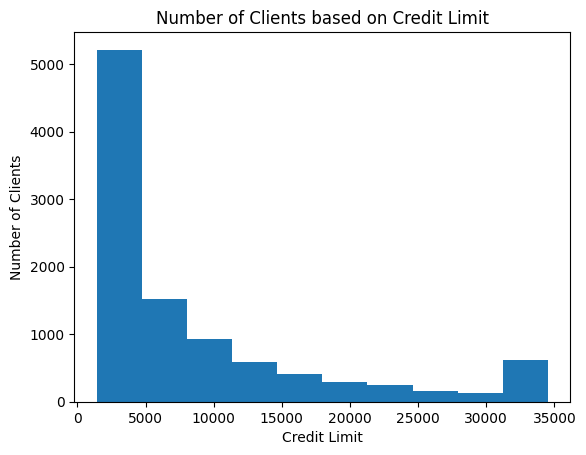

In [291]:
plt.hist(bank_churners_df['credit_limit'])
plt.title('Number of Clients based on Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Number of Clients');

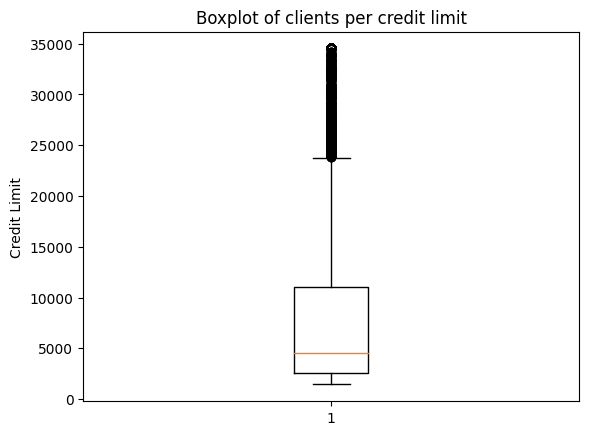

In [292]:
plt.boxplot(bank_churners_df['credit_limit'])
plt.title('Boxplot of clients per credit limit')
plt.ylabel('Credit Limit');

### and a histogram of the outliers gives us a closer look 

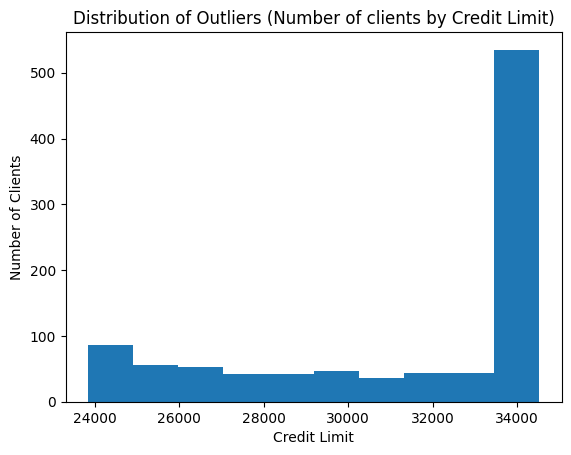

In [293]:
plt.hist(credit_limit_outliers)
plt.title('Distribution of Outliers (Number of clients by Credit Limit)')
plt.xlabel('Credit Limit')
plt.ylabel('Number of Clients');

## Considering that these outliers represent only the top 9% of the customers, it would be best to remove these to get a better analysis of the majority of customers.

**Let's look elsewhere**

**Earlier analysis showed possible outliers in the 'bank_churners_df['avg_open_to_buy']' column**

In [193]:
print(bank_churners_df['avg_open_to_buy'].mean())
print(bank_churners_df['avg_open_to_buy'].median())
print(bank_churners_df['avg_open_to_buy'].min())
print(bank_churners_df['avg_open_to_buy'].max())

7469.139636614989
3474.0
3.0
34516.0


In [194]:
open_to_buy_outliers = find_outliers_IQR(bank_churners_df['avg_open_to_buy'])
print(open_to_buy_outliers)

43       26802.0
85       27872.0
119      31999.0
143      32874.0
164      29868.0
          ...   
10018    22733.0
10023    30792.0
10033    23399.0
10115    32113.0
10126    27001.0
Name: avg_open_to_buy, Length: 963, dtype: float64


In [195]:
print('number of outliers: ' + str(len(open_to_buy_outliers)))
print('outlier min: ' + str(open_to_buy_outliers.min()))
print('outlier max: ' + str(open_to_buy_outliers.max()))

number of outliers: 963
outlier min: 22664.0
outlier max: 34516.0


**We find another 963 outliers in this data as well. let's plot it to see what it looks like**

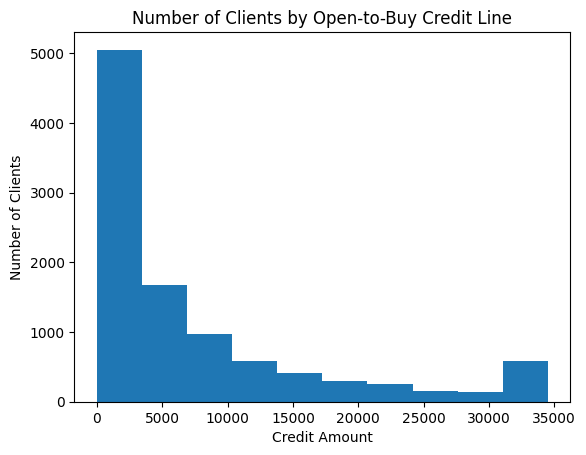

In [294]:
plt.hist(bank_churners_df['avg_open_to_buy'])
plt.title('Number of Clients by Open-to-Buy Credit Line')
plt.xlabel('Credit Amount')
plt.ylabel('Number of Clients');

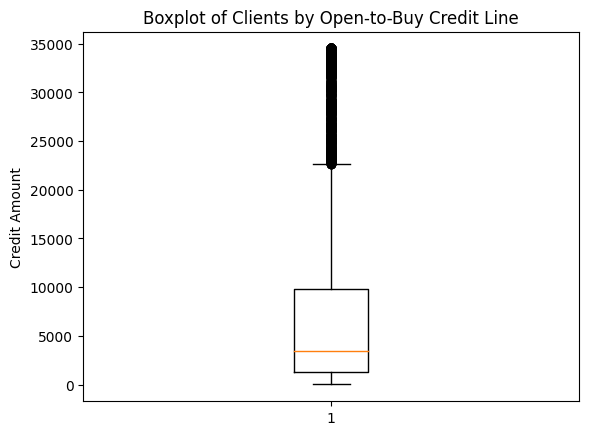

In [295]:
plt.boxplot(bank_churners_df['avg_open_to_buy'])
plt.title('Boxplot of Clients by Open-to-Buy Credit Line')
plt.ylabel('Credit Amount');

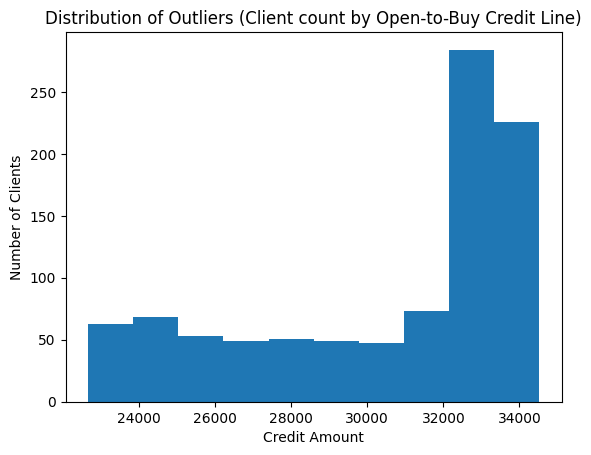

In [296]:
plt.hist(open_to_buy_outliers)
plt.title('Distribution of Outliers (Client count by Open-to-Buy Credit Line)')
plt.xlabel('Credit Amount')
plt.ylabel('Number of Clients');

**This is a very similar result as the one found with the credit limit outliers. Since this data is so closely related to credit limit, we will remove these as well**

**There was one more column that looked like it could have contained outliers. the 'enriched_churn_df['total_trans_amt']' column**

In [199]:
print(enriched_churn_df['total_trans_amt'].median())
print(enriched_churn_df['total_trans_amt'].mean())
print(enriched_churn_df['total_trans_amt'].min())
print(enriched_churn_df['total_trans_amt'].max())


3899.0
4404.086303939963
510
18484


In [200]:
total_trans_outliers = find_outliers_IQR(enriched_churn_df['total_trans_amt'])
print(total_trans_outliers)

17       14593
25       16027
41       14261
82       14762
89       16033
         ...  
10061    13247
10089    13085
10109    14511
10117    15798
10126    15149
Name: total_trans_amt, Length: 896, dtype: int64


In [201]:
print('number of outliers: ' + str(len(total_trans_outliers)))
print('outlier min: ' + str(total_trans_outliers.min()))
print('outlier max: ' + str(total_trans_outliers.max()))

number of outliers: 896
outlier min: 8620
outlier max: 18484


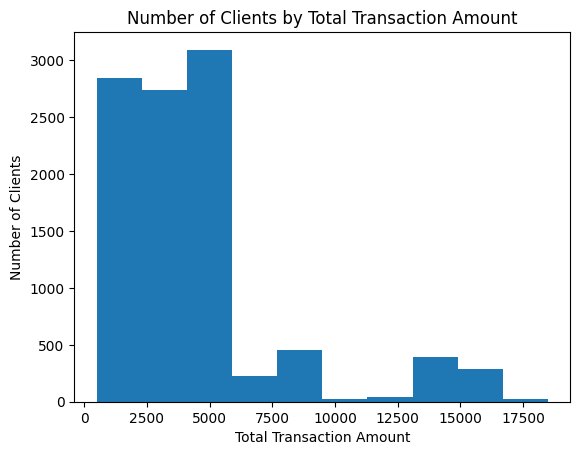

In [297]:
plt.hist(enriched_churn_df['total_trans_amt'])
plt.title('Number of Clients by Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Number of Clients');

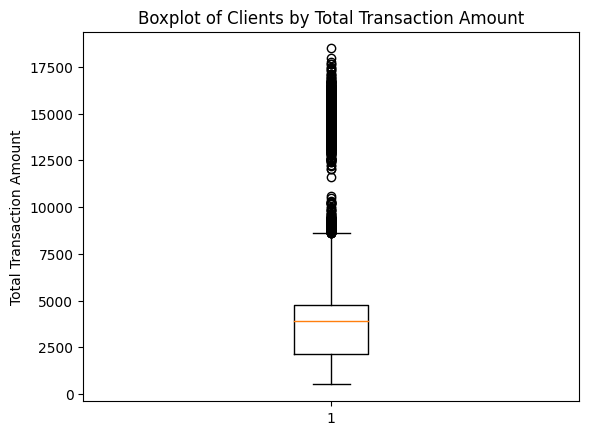

In [300]:
plt.boxplot(enriched_churn_df['total_trans_amt'])
plt.title('Boxplot of Clients by Total Transaction Amount')
plt.ylabel('Total Transaction Amount');

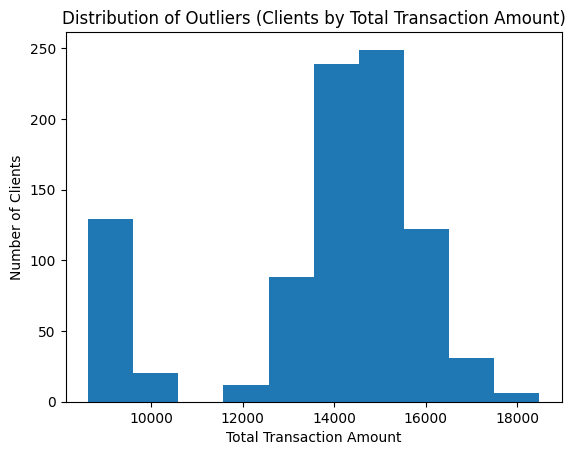

In [301]:
plt.hist(total_trans_outliers)
plt.title('Distribution of Outliers (Clients by Total Transaction Amount)')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Number of Clients');

## **With the nature of this data, it's hard to rule out these outliers as unusable data. However, These outliers represent a small portion of the dataset and of the customers, and should be removed for a proper analysis of the data relating to the majority of the customers**

# Data cleaning process

**first step: make clean copies of the dataframes**

In [205]:

bank_churners_df_clean = bank_churners_df.copy()
basic_client_info_df_clean = basic_client_info_df.copy()
enriched_churn_df_clean = enriched_churn_df.copy()

In [206]:
bank_churners_df_clean.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077
3,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000
4,712720158,Existing Customer,1,Blue,56,2,3,13860.0,12208.0,0.119


In [207]:
basic_client_info_df_clean.head()

,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708082083,45,F,High School,Married,Less than $40K
1,708083283,58,M,Unknown,Single,$40K - $60K
2,708084558,46,M,Doctorate,Divorced,$80K - $120K
3,708085458,34,F,Uneducated,Single,Less than $40K
4,708086958,49,F,Uneducated,Married,Unknown


In [208]:
enriched_churn_df_clean.head()

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,828343083,3,1793,0.803,3646,0.659,68
1,828298908,4,2035,0.613,1770,0.741,47
2,828294933,3,2437,0.765,2519,0.565,36
3,828291858,6,1821,0.630,2381,0.481,40
4,828288333,4,659,0.938,3756,0.842,70


**Define: Merge dataframes for ease of access**

In [209]:
#code
df_merge = bank_churners_df_clean.merge(basic_client_info_df_clean, how = 'left', left_on='clientnum', right_on='clientnum')
df_merge = df_merge.merge(enriched_churn_df_clean, how = 'left', left_on='clientnum', right_on='clientnum')

In [210]:
#test
df_merge.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788,61,M,High School,Married,$40K - $60K,2,2517,1.831,1336,1.143,30
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099,63,M,Unknown,Married,$60K - $80K,3,1010,0.843,1904,1.000,40
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077,66,F,Doctorate,Married,Unknown,5,605,1.052,704,0.143,16
3,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000,62,F,Unknown,Married,Less than $40K,6,0,0.813,1951,1.095,44
4,712720158,Existing Customer,1,Blue,56,2,3,13860.0,12208.0,0.119,68,M,Graduate,Married,Unknown,5,1652,1.255,1910,1.909,32


## **Let's remove the outliers detected in the earlier stages of this analysis. Removing these will give us a more accurate look at the large majority of bank customers**

**First, the 'total_trans_amt' column. We'll grab the minimum outlier value from above and use it as the cutoff**

In [211]:
#Code
index = df_merge[(df_merge['total_trans_amt'] >=8620)].index
df_merge.drop(index, inplace=True)
#Test
df_merge['total_trans_amt'].describe()

count    9231.000000
mean     3494.972159
std      1674.625770
min       510.000000
25%      2050.000000
50%      3654.000000
75%      4520.000000
max      8618.000000
Name: total_trans_amt, dtype: float64

**Next, the avg_open_to_buy column**

In [212]:
#code
index = df_merge[(df_merge['avg_open_to_buy'] >= 22664)].index
df_merge.drop(index, inplace=True)
#Test
df_merge['avg_open_to_buy'].describe()

count     8458.000000
mean      4802.289087
std       5185.301983
min          3.000000
25%       1077.000000
50%       2561.500000
75%       6838.000000
max      22616.000000
Name: avg_open_to_buy, dtype: float64

**Lastly, the credit_limit column**

In [213]:
#code
index = df_merge[(df_merge['credit_limit']>=23848)].index
df_merge.drop(index, inplace = True)
#Test
df_merge['credit_limit'].describe()

count     8428.000000
mean      5887.007724
std       5068.040532
min       1438.300000
25%       2354.750000
50%       3614.500000
75%       7901.750000
max      23700.000000
Name: credit_limit, dtype: float64

**Considering removing 'Unknown' values from columns. First I'll check how many values this would mean removing**

In [214]:
df_merge['education_level'].value_counts()['Unknown']

1253

In [215]:
df_merge['marital_status'].value_counts()['Unknown']

609

In [216]:
df_merge['income_category'].value_counts()['Unknown']

960

**These unknown values represent a large portion of the dataset. Instead of removing them entirely, I'll just filter them out as need be. Removing so many rows in this size of dataset could misrepresent the data**

In [217]:
df_merge.describe()

,clientnum,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,8.428000e+03,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000
mean,7.394134e+08,2.328192,36.002848,2.352159,2.463811,5887.007724,4740.660430,0.308252,46.433318,3.969032,1146.347295,0.757018,3470.583887,0.709138,60.971998
std,3.697011e+07,1.298840,8.079614,1.017982,1.110484,5068.040532,5090.350639,0.283063,8.123129,1.492075,816.797911,0.226716,1612.486862,0.246018,20.017796
min,7.080833e+08,0.000000,13.000000,0.000000,0.000000,1438.300000,3.000000,0.000000,26.000000,1.000000,0.000000,0.000000,510.000000,0.000000,10.000000
25%,7.130612e+08,1.000000,31.000000,2.000000,2.000000,2354.750000,1073.000000,0.000000,41.000000,3.000000,0.000000,0.623000,2064.000000,0.571000,43.000000
50%,7.179228e+08,2.000000,36.000000,2.000000,2.000000,3614.500000,2542.500000,0.233000,46.000000,4.000000,1257.000000,0.730000,3680.000000,0.694000,65.000000
75%,7.734755e+08,3.000000,41.000000,3.000000,3.000000,7901.750000,6732.500000,0.556250,52.000000,5.000000,1769.000000,0.857000,4519.000000,0.822000,77.000000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,23700.000000,22599.000000,0.999000,73.000000,6.000000,2517.000000,3.397000,8618.000000,3.714000,113.000000


**Check the datatypes in the new merged dataframe for anything that may need to be changed**

In [218]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8428 entries, 0 to 10123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 8428 non-null   int64  
 1   attrition_flag            8428 non-null   object 
 2   dependent_count           8428 non-null   int64  
 3   card_category             8428 non-null   object 
 4   months_on_book            8428 non-null   int64  
 5   months_inactive_12_mon    8428 non-null   int64  
 6   contacts_count_12_mon     8428 non-null   int64  
 7   credit_limit              8428 non-null   float64
 8   avg_open_to_buy           8428 non-null   float64
 9   avg_utilization_ratio     8428 non-null   float64
 10  customer_age              8428 non-null   int64  
 11  gender                    8428 non-null   object 
 12  education_level           8428 non-null   object 
 13  marital_status            8428 non-null   object 
 14  income_

**Check the new dataframe for null values that may need to be removed**

In [219]:
df_merge.isna().sum()

clientnum                   0
attrition_flag              0
dependent_count             0
card_category               0
months_on_book              0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
avg_open_to_buy             0
avg_utilization_ratio       0
customer_age                0
gender                      0
education_level             0
marital_status              0
income_category             0
total_relationship_count    0
total_revolving_bal         0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_ct_chng_q4_q1         0
total_trans_ct              0
dtype: int64

## Overall, the most important part of this data cleaning was removing the outliers from the 'total_trans_amt, 'avg_open_to_buy' and 'credit_limit' columns, as these were only representative of the top 10%(approx.) of customers. Since I want to get a better look at the average customer, removing these will provide clearer insight into the rest of the data.

**Removing the 'Unknown' columns would not have provided the insight that I'm looking for and would have simply removed usable data**

# **Distribution Analysis**

In [220]:
df_merge.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788,61,M,High School,Married,$40K - $60K,2,2517,1.831,1336,1.143,30
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099,63,M,Unknown,Married,$60K - $80K,3,1010,0.843,1904,1.000,40
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077,66,F,Doctorate,Married,Unknown,5,605,1.052,704,0.143,16
3,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000,62,F,Unknown,Married,Less than $40K,6,0,0.813,1951,1.095,44
4,712720158,Existing Customer,1,Blue,56,2,3,13860.0,12208.0,0.119,68,M,Graduate,Married,Unknown,5,1652,1.255,1910,1.909,32


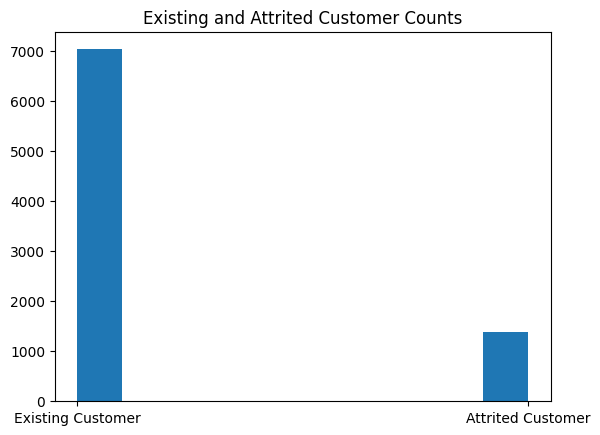

In [221]:
plt.hist(df_merge['attrition_flag'])
plt.title('Existing and Attrited Customer Counts');

**It seems that the current ration of Churned customers to existing customers is pretty good. We will see what areas may see more churn later on**

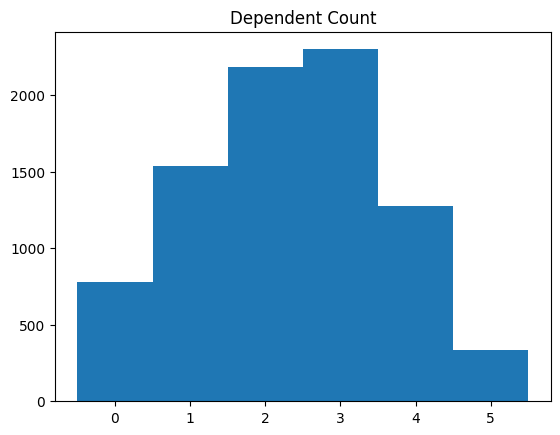

In [222]:
plt.hist(df_merge['dependent_count'],bins = np.arange(7)-0.5)
plt.title('Dependent Count');

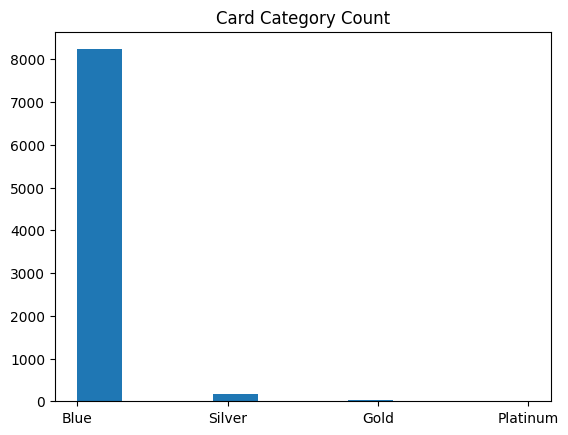

In [223]:
plt.hist(df_merge['card_category'])
plt.title('Card Category Count');

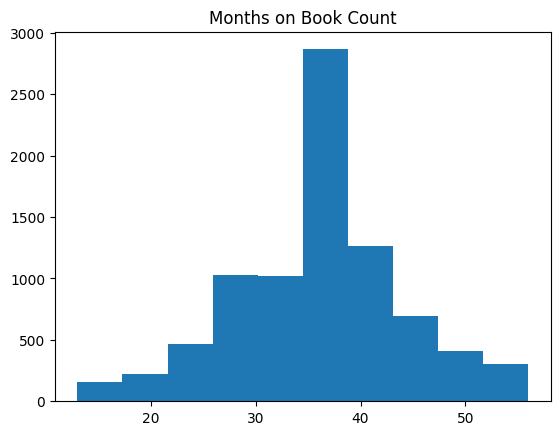

In [224]:
plt.hist(df_merge['months_on_book'])
plt.title('Months on Book Count');

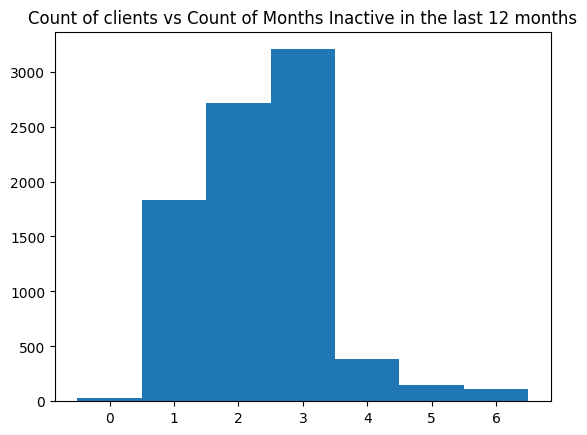

In [225]:
plt.hist(df_merge['months_inactive_12_mon'], bins = np.arange(8)-0.5)
plt.title('Count of clients vs Count of Months Inactive in the last 12 months');

**It seems as though a large number of clients often go up to 3 months without activity. A more specific look at these clients could provide some insight**

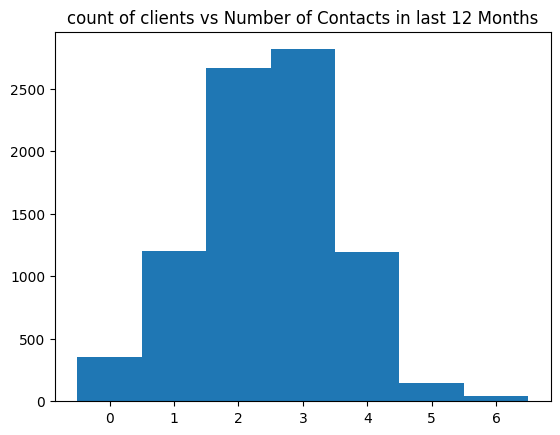

In [226]:
plt.hist(df_merge['contacts_count_12_mon'], bins = np.arange(8)-0.5)
plt.title('count of clients vs Number of Contacts in last 12 Months');

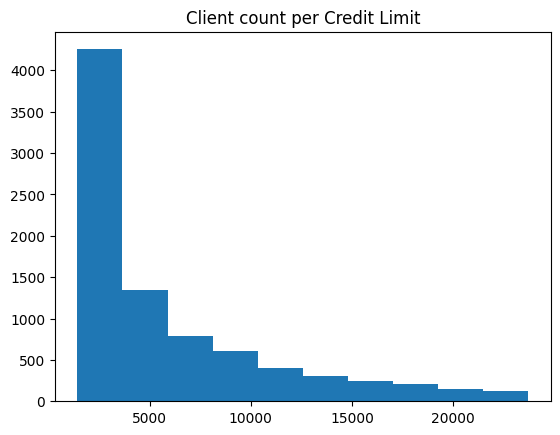

In [227]:
plt.hist(df_merge['credit_limit'])
plt.title('Client count per Credit Limit');

**The bulk of clients hold a credit limit below 5000. It will be interesting to see how credit limits relate to churn**

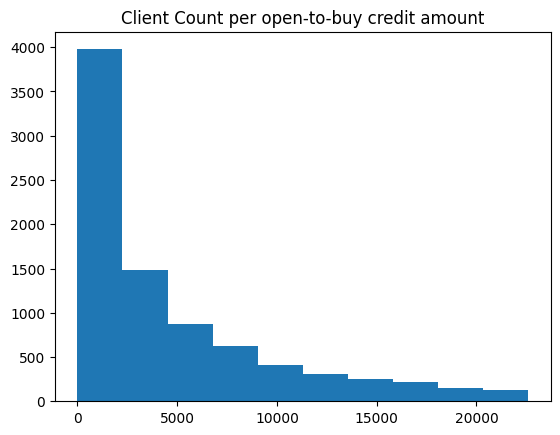

In [228]:
plt.hist(df_merge['avg_open_to_buy'])
plt.title('Client Count per open-to-buy credit amount');

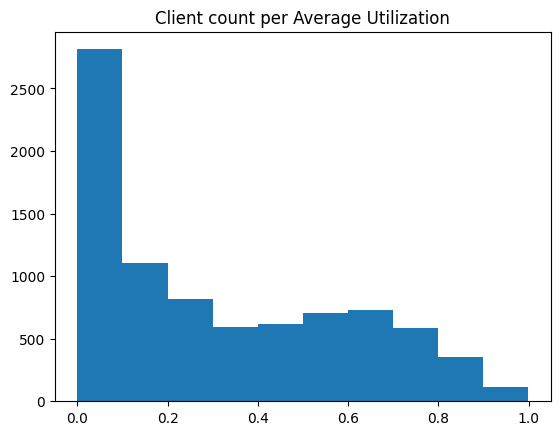

In [229]:
plt.hist(df_merge['avg_utilization_ratio'])
plt.title('Client count per Average Utilization');

**A large number of clients have very low utilization. If low (or high) utilization is at all related to churn, this could be insightful**

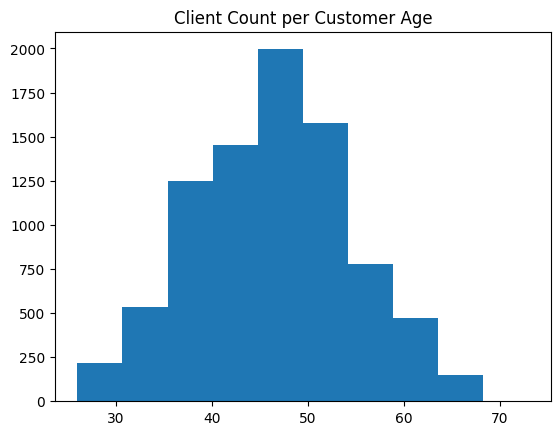

In [230]:
plt.hist(df_merge['customer_age'])
plt.title('Client Count per Customer Age');

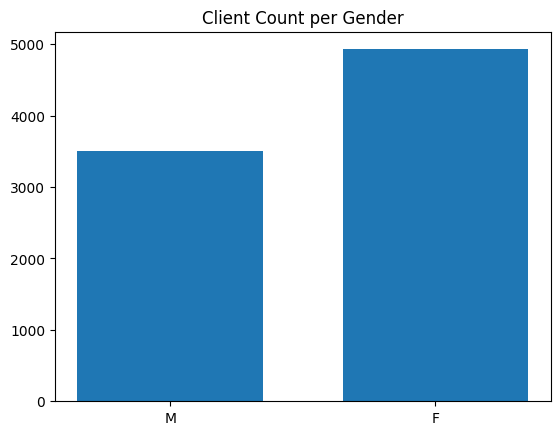

In [231]:
plt.hist(df_merge['gender'], bins = np.arange(3)-0.5, rwidth=0.7)
plt.title('Client Count per Gender');

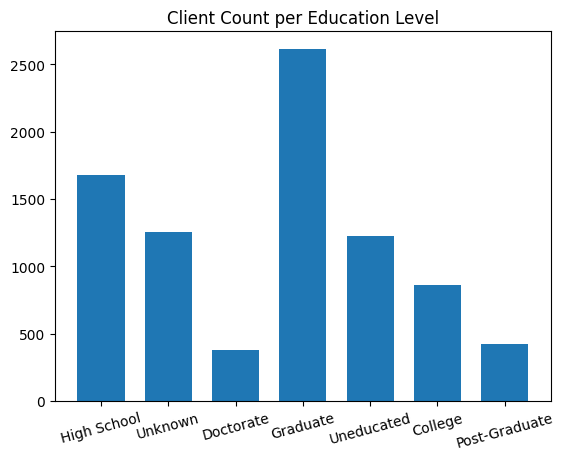

In [232]:
plt.hist(df_merge['education_level'], bins = np.arange(8)-0.5, rwidth=0.7);
plt.xticks(rotation=15)
plt.title('Client Count per Education Level');

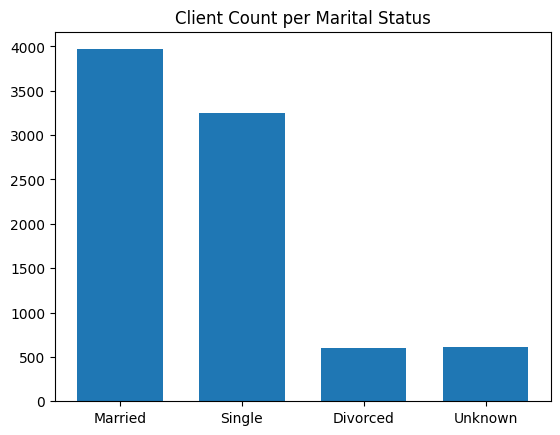

In [233]:
plt.hist(df_merge['marital_status'], bins=np.arange(5)-0.5,rwidth=0.7)
plt.title('Client Count per Marital Status');

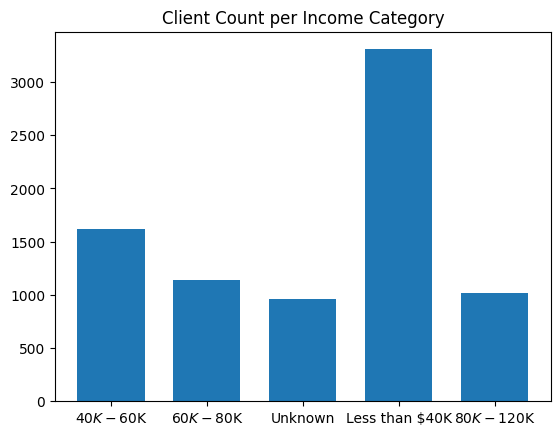

In [234]:
plt.hist(df_merge['income_category'], bins=np.arange(6)-0.5,rwidth=0.7)
plt.title('Client Count per Income Category');

**Given the last three visuals, there is a large number of married, graduate level educated clients, but also a majority of clients making less than $40K. We should explore these relationships**

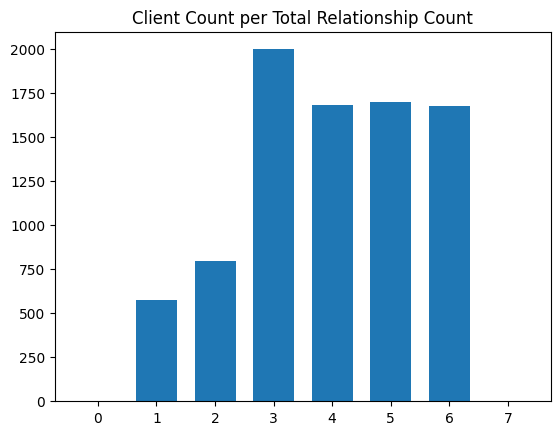

In [235]:
plt.hist(df_merge['total_relationship_count'], bins=np.arange(9)-0.5, rwidth=0.7)
plt.title('Client Count per Total Relationship Count');



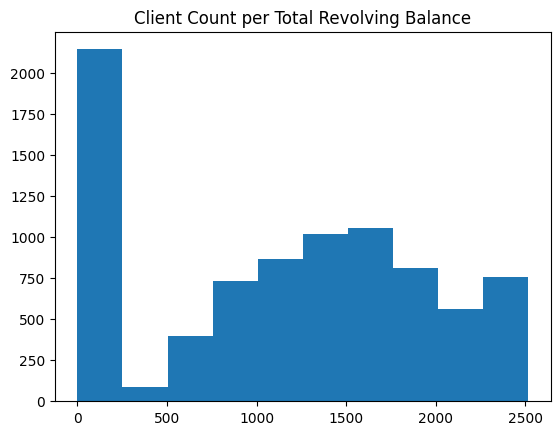

In [236]:
plt.hist(df_merge['total_revolving_bal'])
plt.title('Client Count per Total Revolving Balance');

**A large number of clients seem to hold below a $500 revolving balance. Are Clients with smaller balances more likely to churn?**

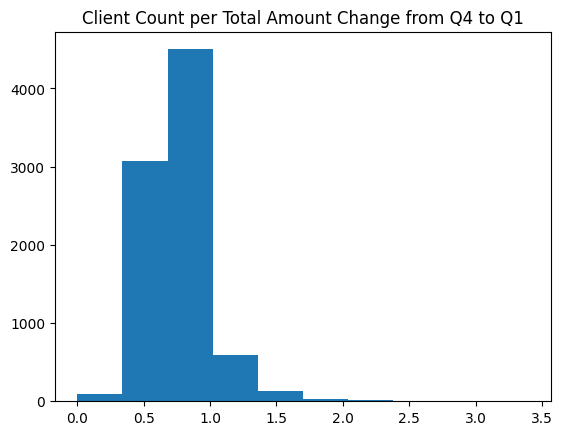

In [237]:
plt.hist(df_merge['total_amt_chng_q4_q1'])
plt.title('Client Count per Total Amount Change from Q4 to Q1');

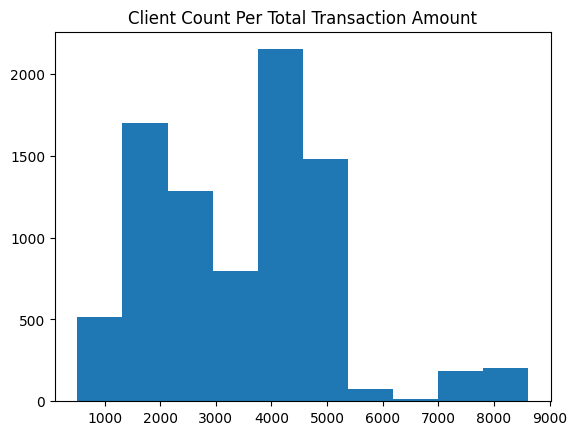

In [238]:
plt.hist(df_merge['total_trans_amt'])
plt.title('Client Count Per Total Transaction Amount');

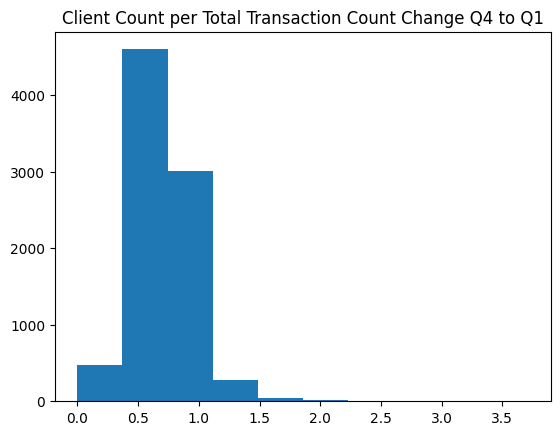

In [239]:
plt.hist(df_merge['total_ct_chng_q4_q1'])
plt.title('Client Count per Total Transaction Count Change Q4 to Q1');

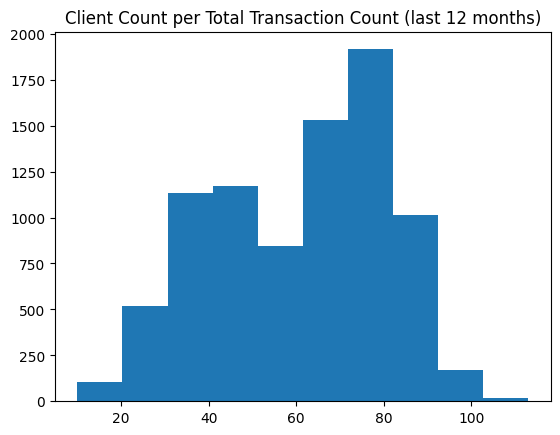

In [240]:
plt.hist(df_merge['total_trans_ct'])
plt.title('Client Count per Total Transaction Count (last 12 months)');

**Let's plot them all together for a quicker reference**

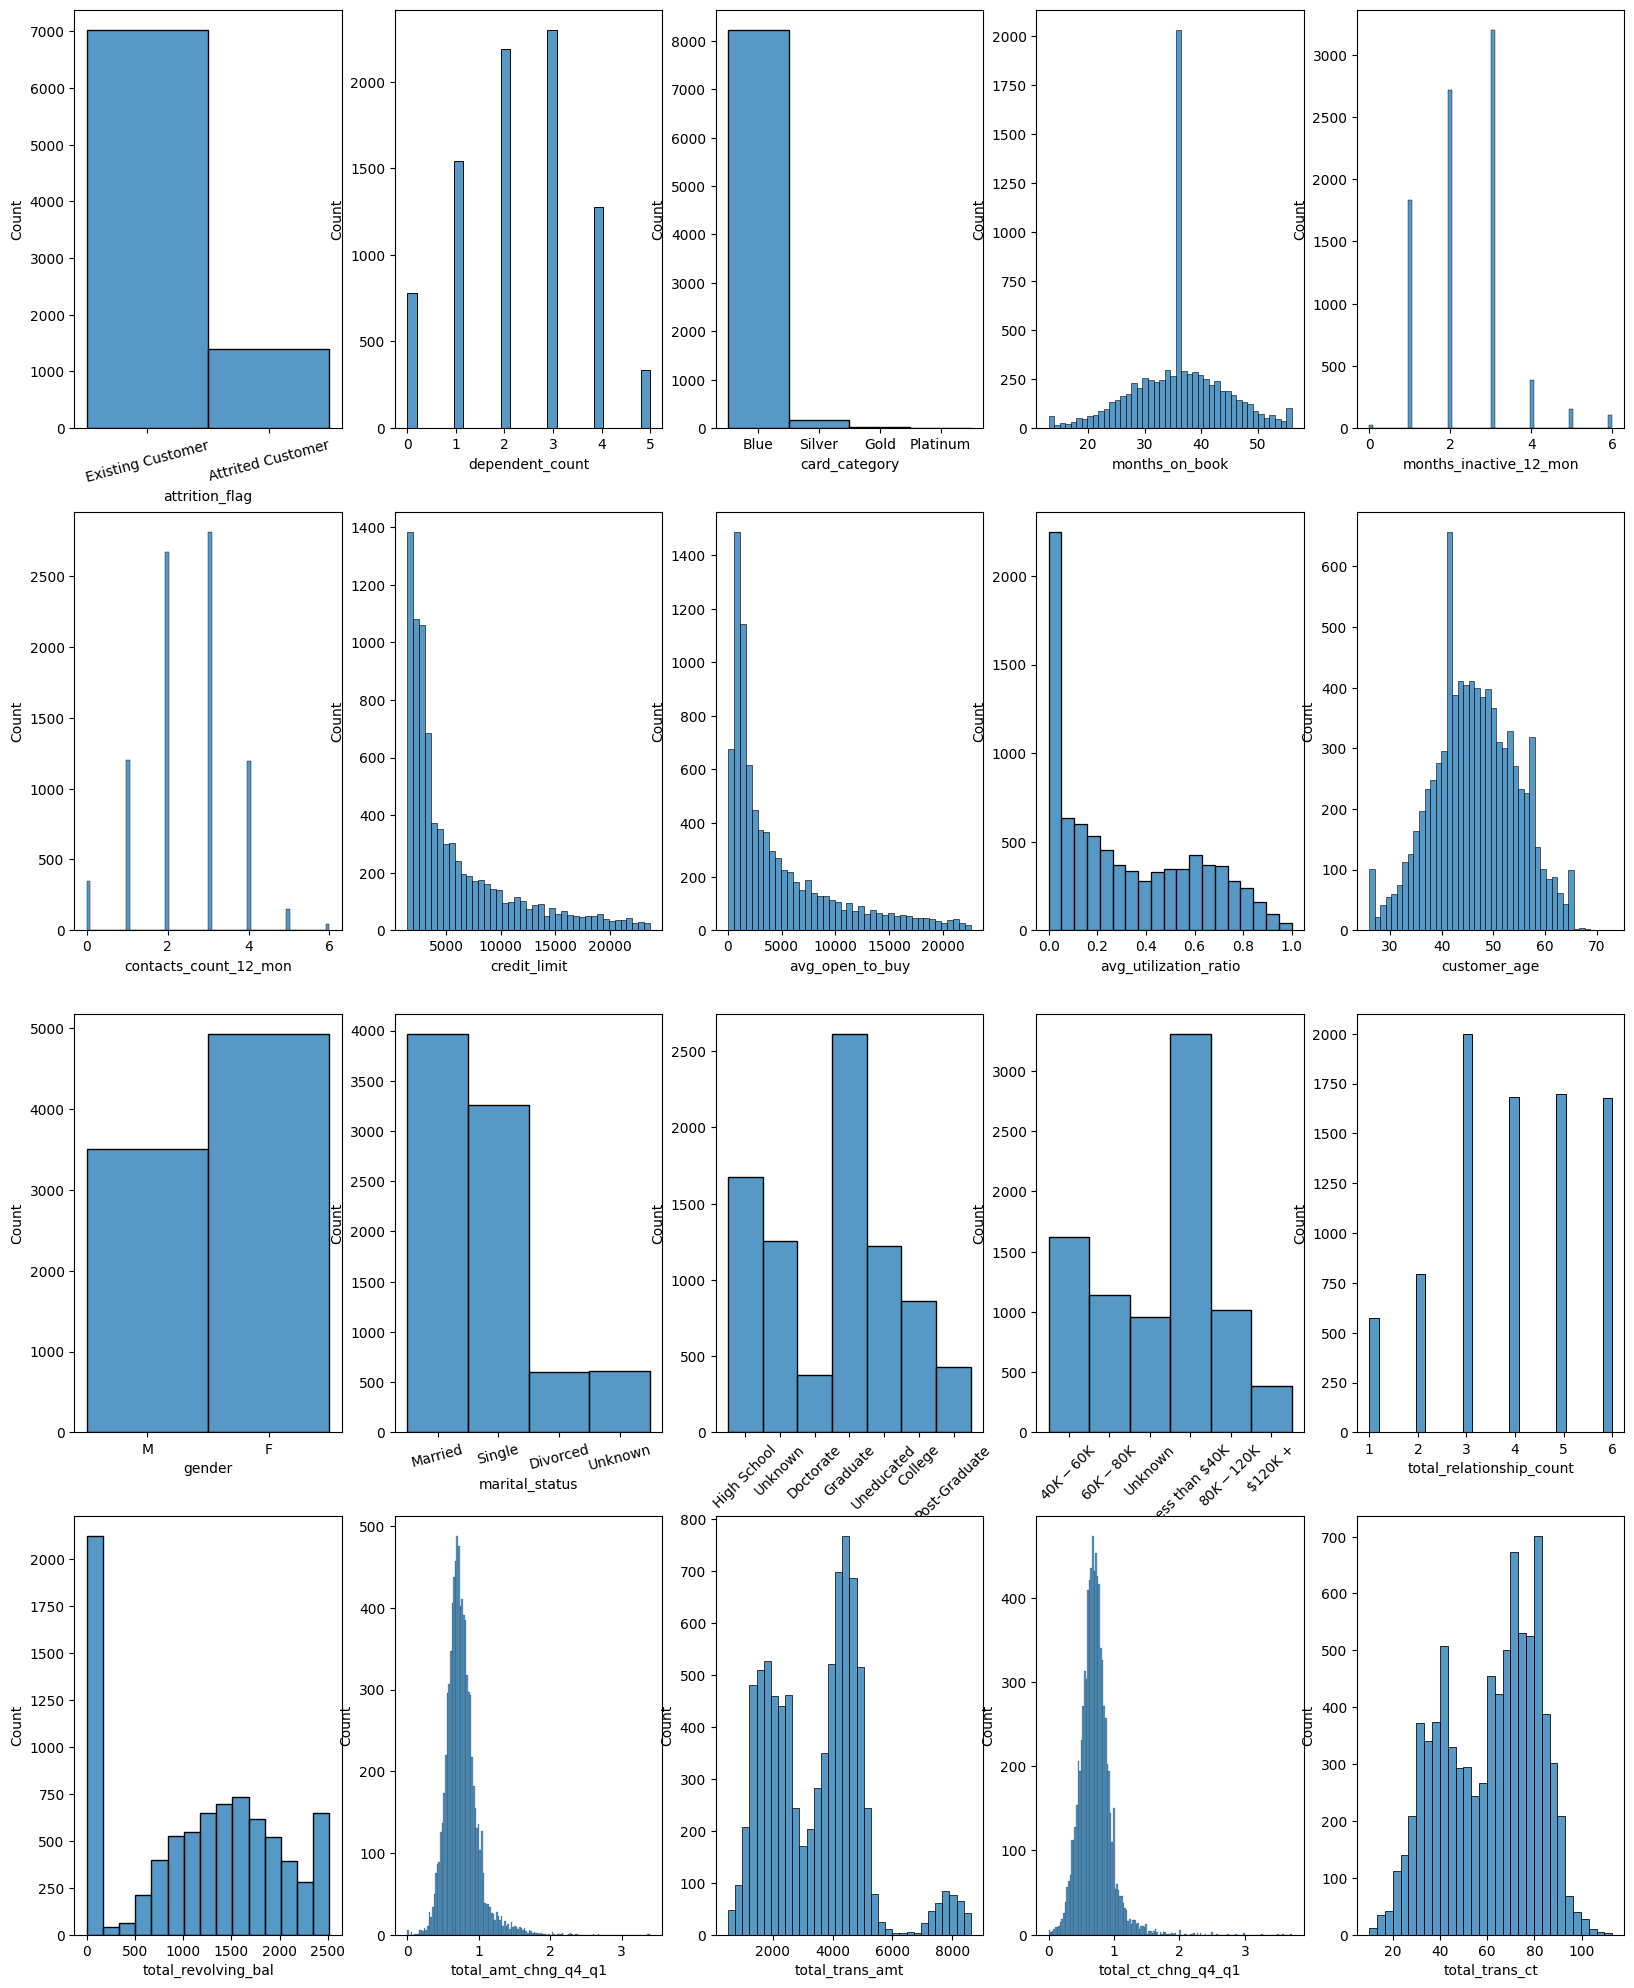

In [241]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,25))
cust_hist = sns.histplot(ax=axes[0,0], data = df_merge, x='attrition_flag')
sns.histplot(ax=axes[0,1], data = df_merge, x='dependent_count')
sns.histplot(ax=axes[0,2], data = df_merge, x='card_category')
sns.histplot(ax=axes[0,3], data = df_merge, x='months_on_book')
sns.histplot(ax=axes[0,4], data = df_merge, x='months_inactive_12_mon')
sns.histplot(ax=axes[1,0], data = df_merge, x='contacts_count_12_mon')
sns.histplot(ax=axes[1,1], data = df_merge, x='credit_limit')
sns.histplot(ax=axes[1,2], data = df_merge, x='avg_open_to_buy')
sns.histplot(ax=axes[1,3], data = df_merge, x='avg_utilization_ratio')
sns.histplot(ax=axes[1,4], data = df_merge, x='customer_age')
sns.histplot(ax=axes[2,0], data = df_merge, x='gender')
marital_hist = sns.histplot(ax=axes[2,1], data = df_merge, x='marital_status')
edu_hist = sns.histplot(ax=axes[2,2], data = df_merge, x='education_level')
inc_hist = sns.histplot(ax=axes[2,3], data = df_merge, x='income_category')
sns.histplot(ax=axes[2,4], data = df_merge, x='total_relationship_count')
sns.histplot(ax=axes[3,0], data = df_merge, x='total_revolving_bal')
sns.histplot(ax=axes[3,1], data = df_merge, x='total_amt_chng_q4_q1')
sns.histplot(ax=axes[3,2], data = df_merge, x='total_trans_amt')
sns.histplot(ax=axes[3,3], data = df_merge, x='total_ct_chng_q4_q1')
sns.histplot(ax=axes[3,4], data = df_merge, x='total_trans_ct')

cust_hist.set_xticklabels(cust_hist.get_xticklabels(), rotation = 15);
marital_hist.set_xticklabels(marital_hist.get_xticklabels(), rotation = 15);
edu_hist.set_xticklabels(edu_hist.get_xticklabels(), rotation = 45)
inc_hist.set_xticklabels(inc_hist.get_xticklabels(), rotation = 45);


## Areas of interest found through this distribution analysis are credit limits, revolving balances, activity or utilization, and the relationship between education, income range, and marital status. Let's perform some Cross Correlation analysis to look for useful insights.

# Cross-Correlation Analysis

**I want to explore the relationships between some of these columns. Let's start with education level and marital status**

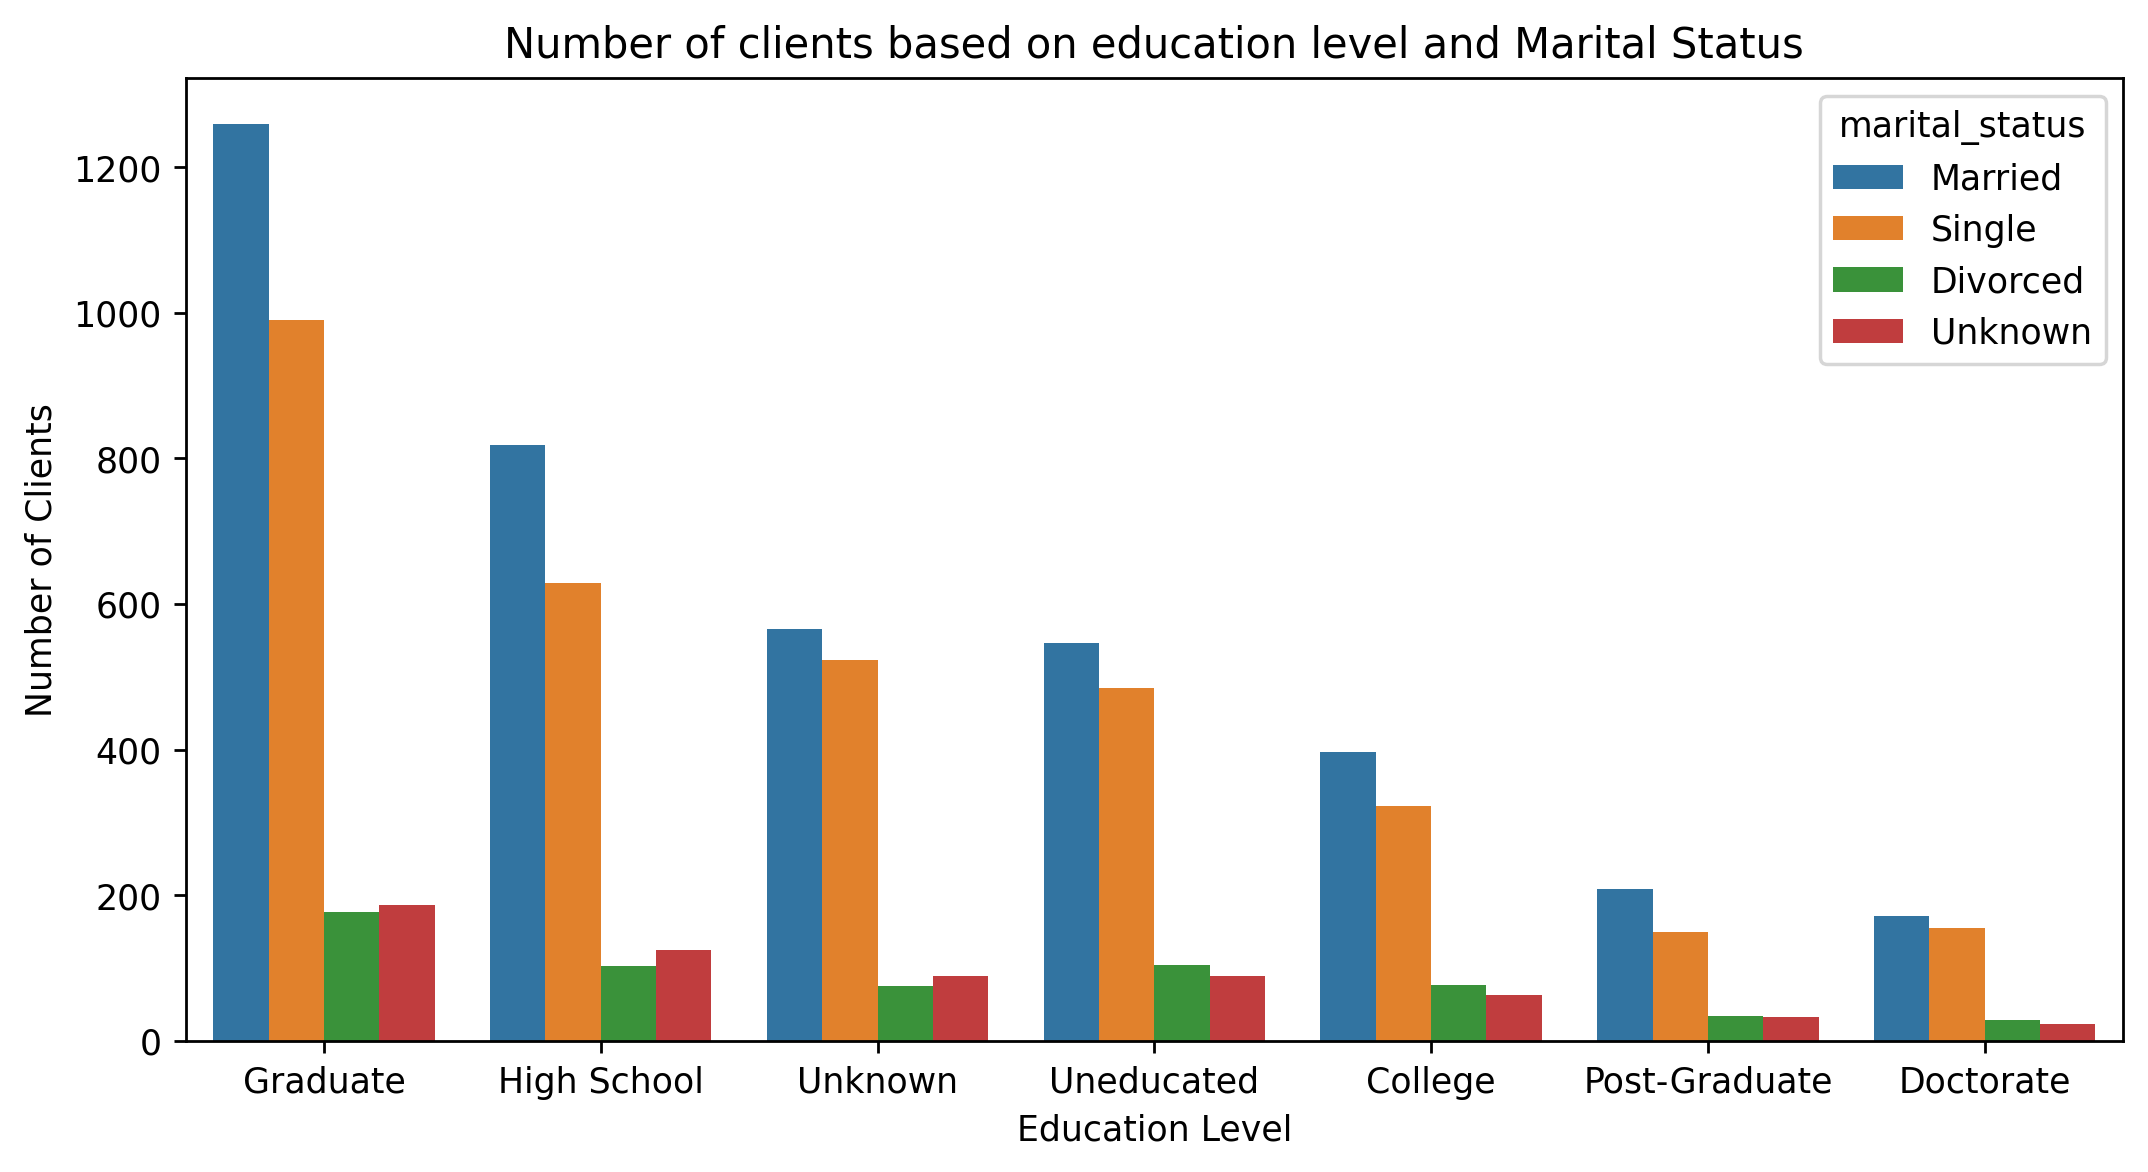

In [284]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=250)
sns.countplot(data=df_merge, x='education_level', hue='marital_status', order=df_merge['education_level'].value_counts().index)
plt.title('Number of clients based on education level and Marital Status')
plt.xlabel('Education Level')
plt.ylabel('Number of Clients');

**And let's see income category and marital status**

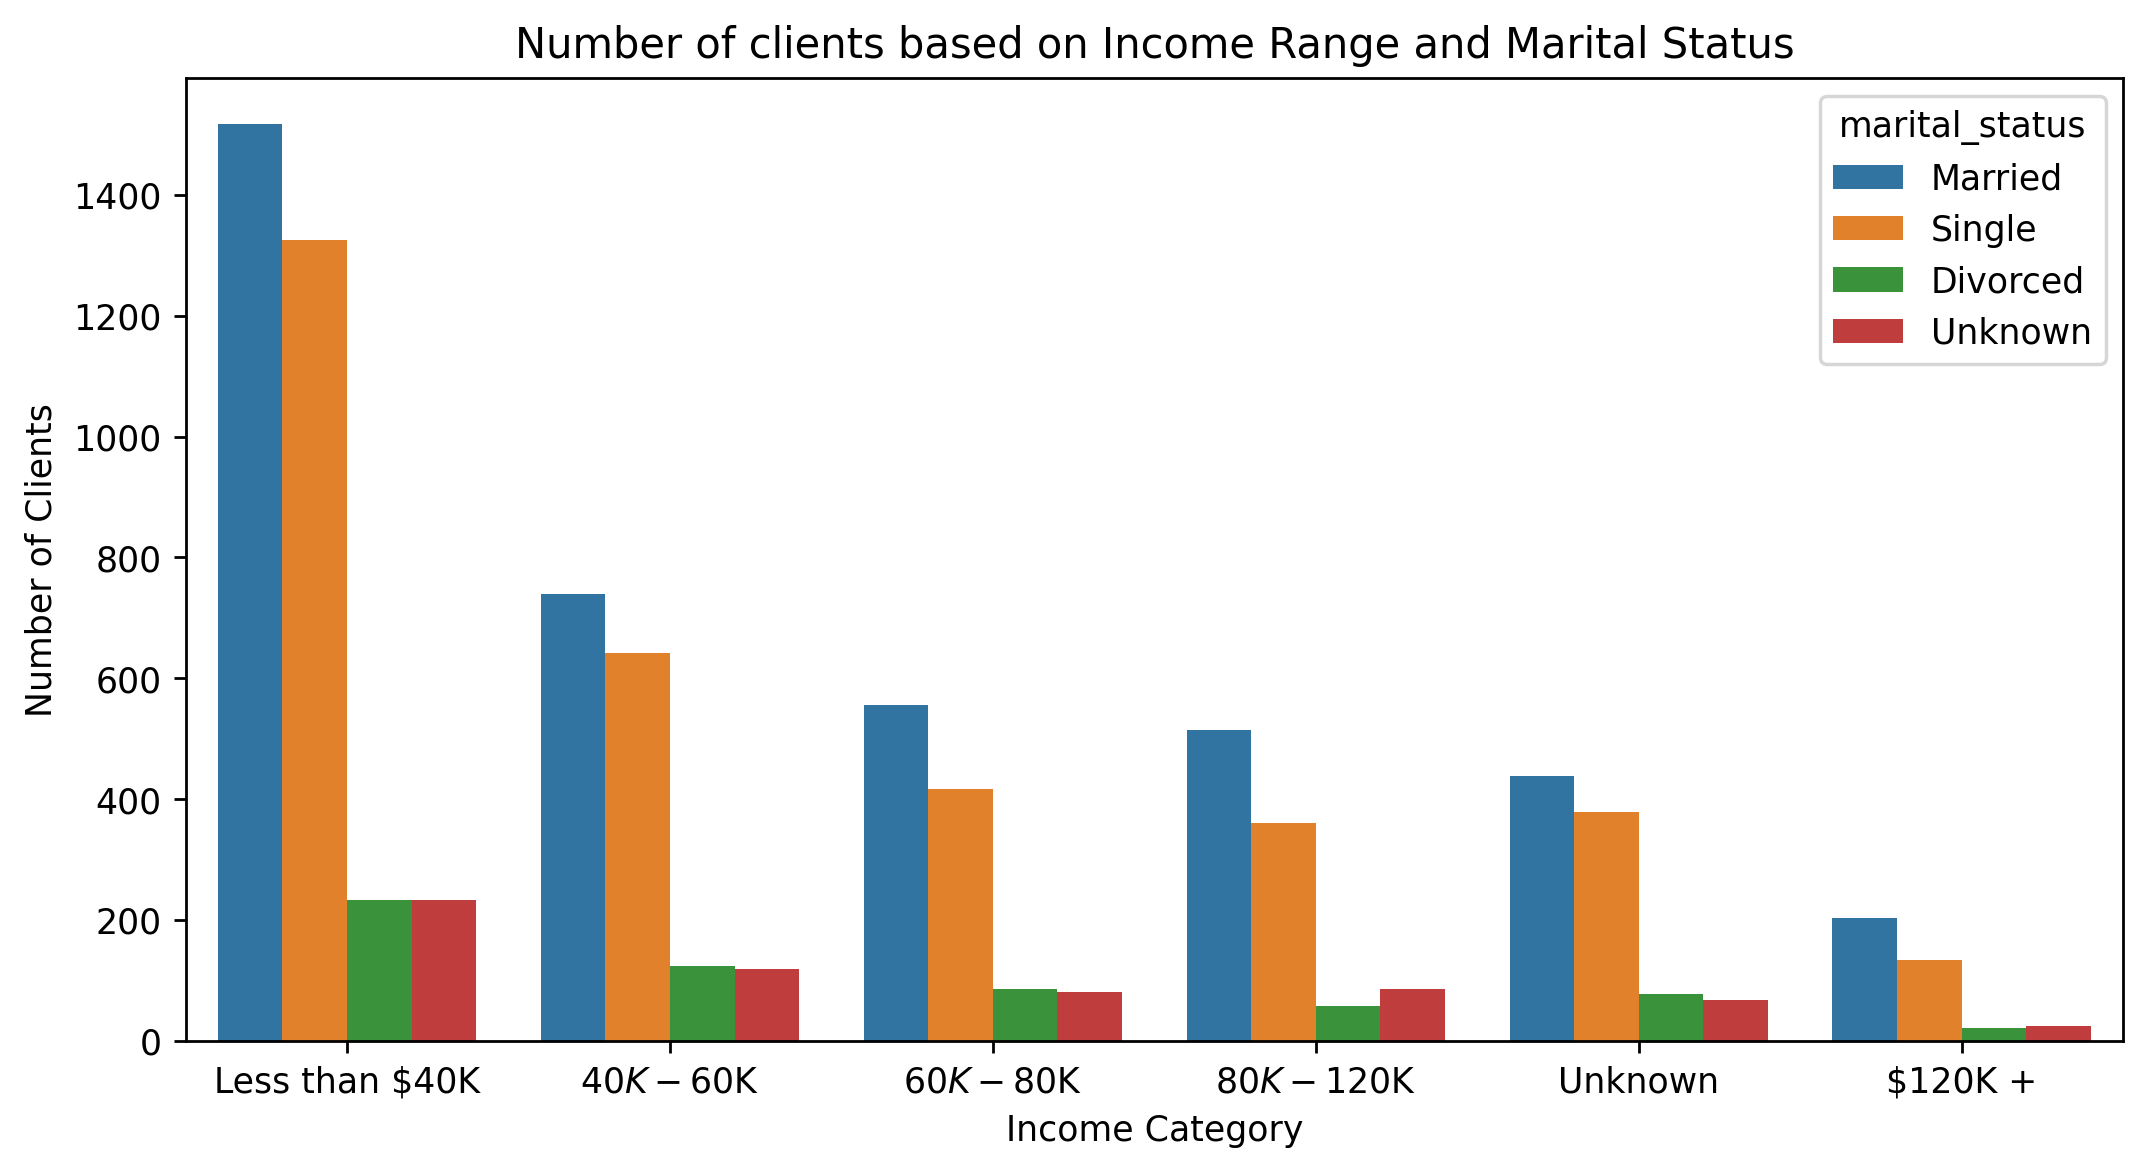

In [285]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=250)
sns.countplot(data=df_merge, x='income_category', hue='marital_status', order=df_merge['income_category'].value_counts().index)
plt.title('Number of clients based on Income Range and Marital Status')
plt.xlabel('Income Category')
plt.ylabel('Number of Clients');

**So it doess seem as though a large bulk of the clients are married, hold a graduate level of education, and make less than $40K. For further analysis, I'll create a churn rate variable to compare against these columns**

In [244]:
churned_cust = df_merge.loc[df_merge['attrition_flag'] == 'Attrited Customer']
existing_cust = df_merge.loc[df_merge['attrition_flag'] == 'Existing Customer']
churned_cust_count = churned_cust['attrition_flag'].count()
total_cust_count = df_merge['attrition_flag'].count()
print('total number of customers: ' + str(total_cust_count))
print('total number of churned customers: ' + str(churned_cust_count))
churn_rate = churned_cust_count/total_cust_count*100
print('churn rate: ' + str(churn_rate))


total number of customers: 8428
total number of churned customers: 1394
churn rate: 16.540104413858568


In [245]:
df_merge['attrition_flag'].value_counts(normalize=True)*100


Existing Customer    83.459896
Attrited Customer    16.540104
Name: attrition_flag, dtype: float64

**maybe consider changing the data type of this column to boolean for easier access**

In [246]:
c={'Attrited Customer': True, 'Existing Customer':False}
df_merge['churn']=df_merge['attrition_flag']
df_merge['churn'].replace(c, inplace=True)

In [247]:
#let's confirm that the replace worked
df_merge['churn'].mean()

0.16540104413858567

**Using this new column, we can calculate numerical statistics based on churned customers. Let's start with comparing the average credit limits of churned vs existing customers**

In [248]:
#Average credit limit of churned customers
print('The average credit limit of churned customers: ' + str(df_merge[df_merge['churn']==1]['credit_limit'].mean().round(2)))
#Average credit limit of existing customers
print('The average credit limit of existing customers: ' + str(df_merge[df_merge['churn']==0]['credit_limit'].mean().round(2)))

The average credit limit of churned customers: 5351.92
The average credit limit of existing customers: 5993.05


**I want to compare the average utilization ratio between churned and existing customers**

In [249]:
print('The average utilization ratio of churned customers: ' + str(df_merge[df_merge['churn']==1]['avg_utilization_ratio'].mean().round(2)*100))
print('The average utilization ratio of existing customers: ' + str(df_merge[df_merge['churn']==0]['avg_utilization_ratio'].mean().round(2)*100));

The average utilization ratio of churned customers: 18.0
The average utilization ratio of existing customers: 33.0


**Using the data of churned customers only, let's look at the same data**

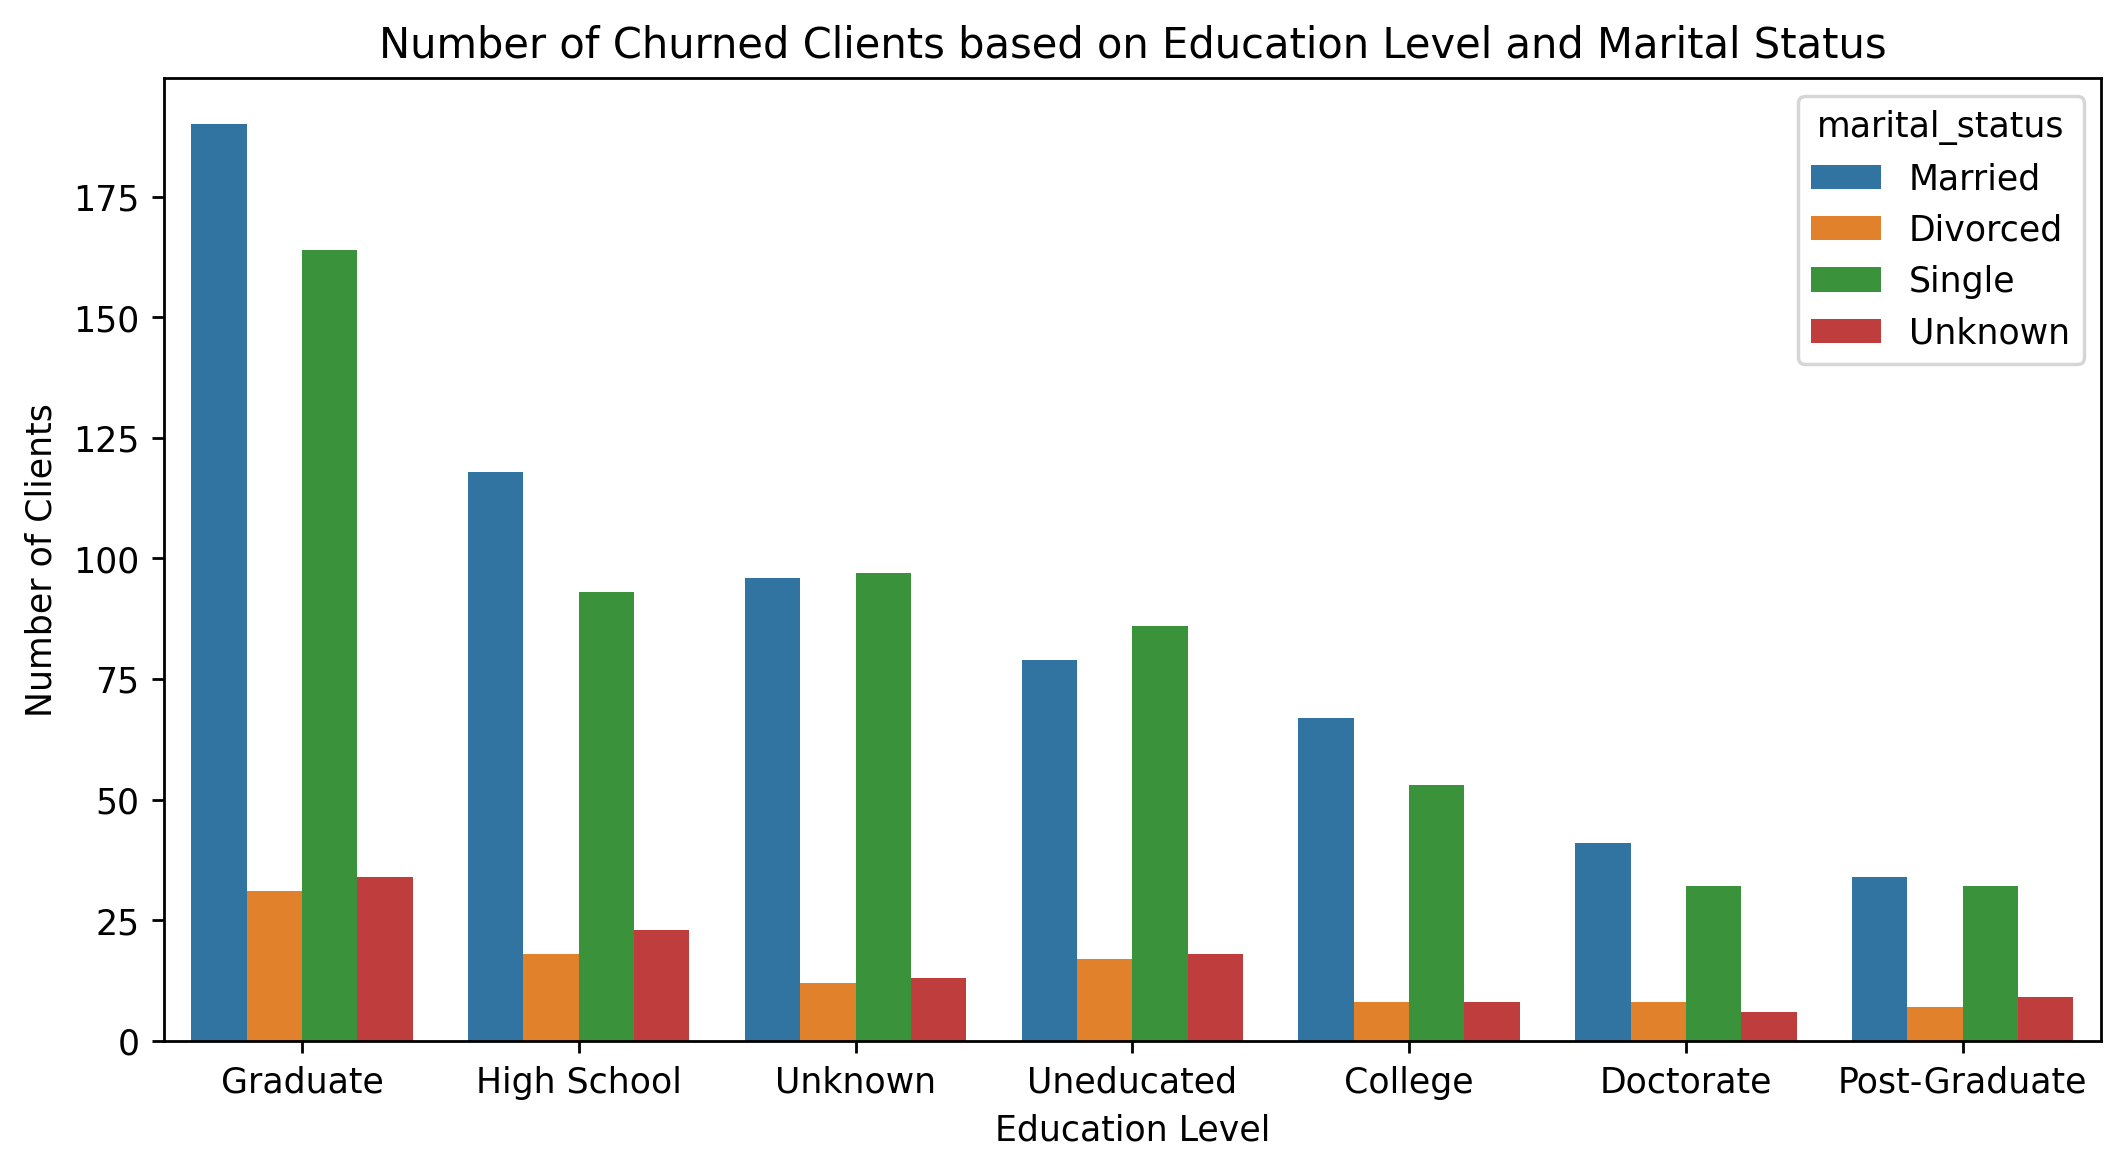

In [286]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=250)
sns.countplot(data=churned_cust, x='education_level', hue='marital_status', order=churned_cust['education_level'].value_counts().index)
plt.title('Number of Churned Clients based on Education Level and Marital Status')
plt.xlabel('Education Level')
plt.ylabel('Number of Clients');

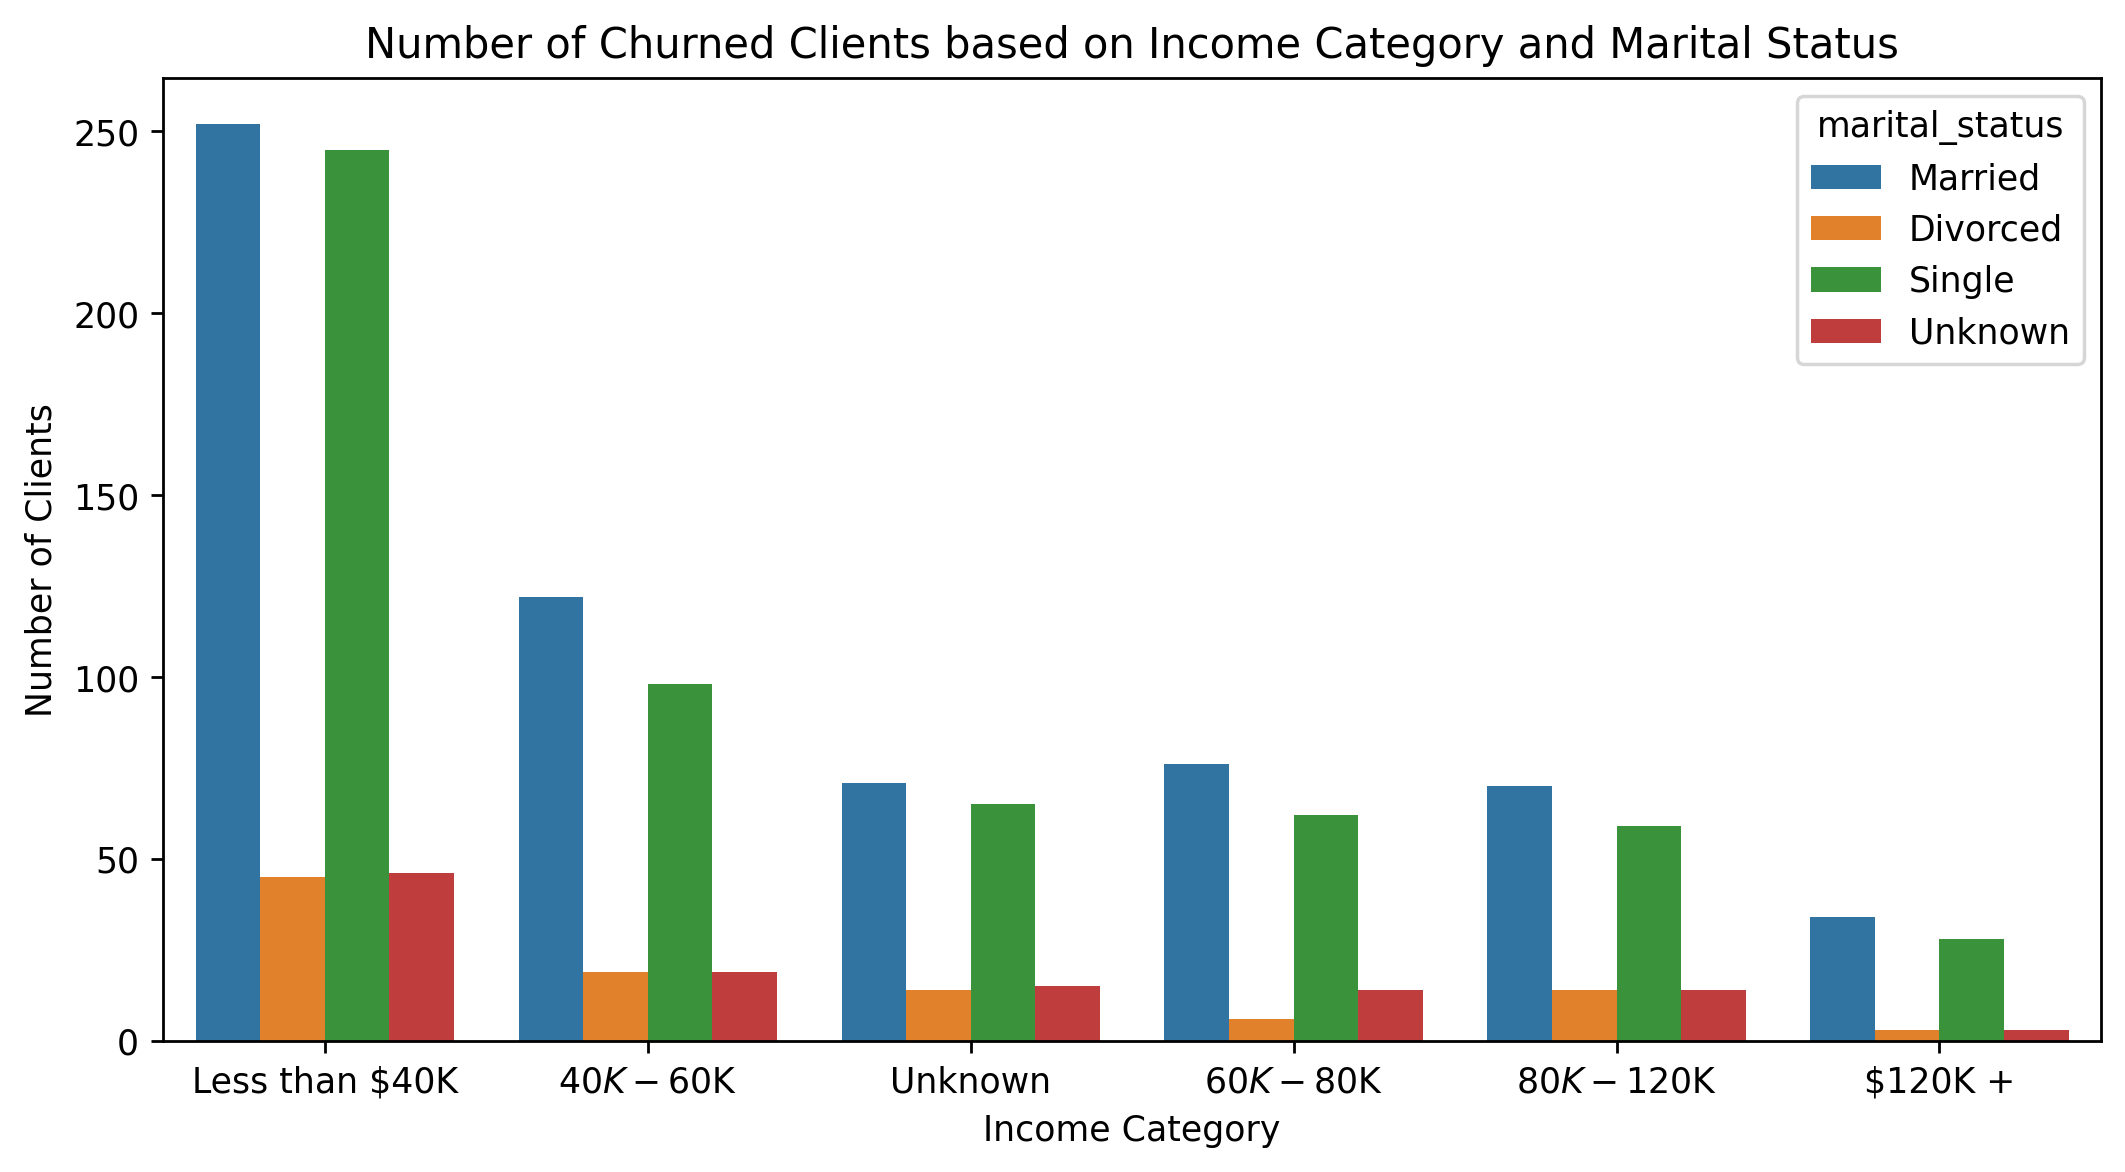

In [287]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=250)
sns.countplot(data = churned_cust, x='income_category', hue='marital_status', order=churned_cust['income_category'].value_counts().index)
plt.title('Number of Churned Clients based on Income Category and Marital Status')
plt.xlabel('Income Category')
plt.ylabel('Number of Clients');

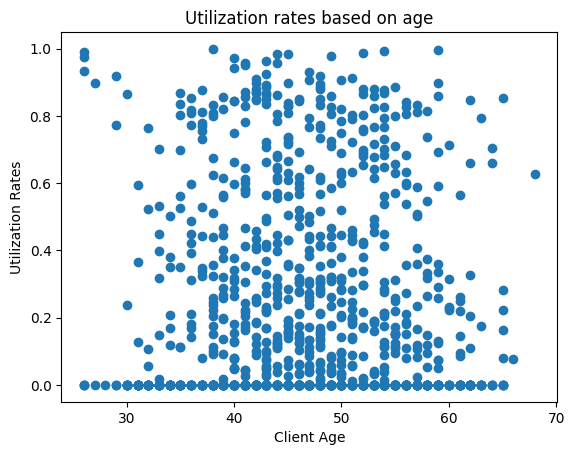

In [252]:
plt.scatter(data=churned_cust, y='avg_utilization_ratio', x='customer_age')
plt.title('Utilization rates based on age')
plt.ylabel('Utilization Rates')
plt.xlabel('Client Age');

**Above, when looking at churned customers specifically, we see no strong correlation between age and utilization**

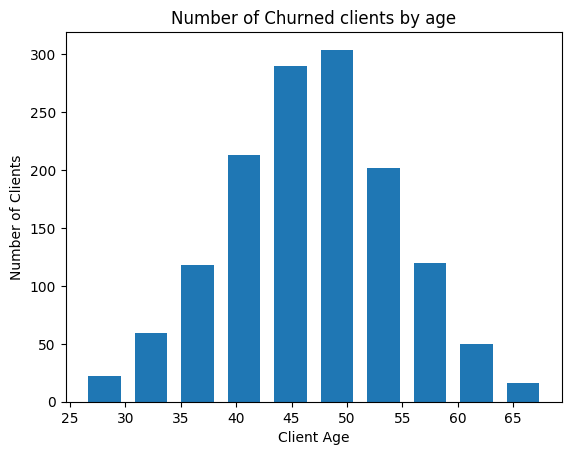

In [253]:
plt.hist(churned_cust['customer_age'], rwidth=0.7)
plt.title('Number of Churned clients by age')
plt.xlabel('Client Age')
plt.ylabel('Number of Clients');

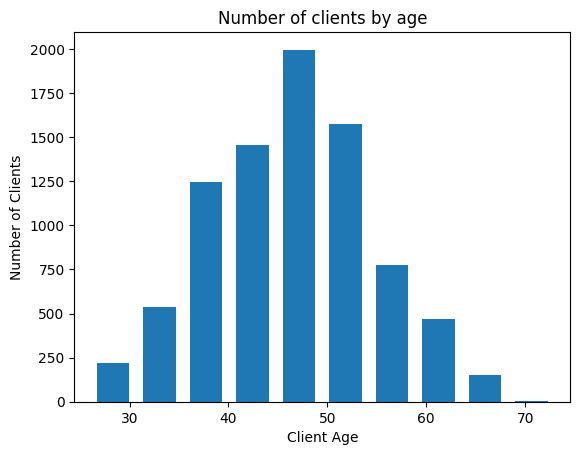

In [254]:
plt.hist(df_merge['customer_age'], rwidth=0.7)
plt.title('Number of clients by age')
plt.xlabel('Client Age')
plt.ylabel('Number of Clients');

**Here we see a normal distribution of ages when looking at churned clients. Most of the clients, in general, are between the ages of 45 and 50, so it's not surprising to see that this age group accouts for the most churned customers as well**

## Summary: Through my analysis above, I've discovered that the majority of churned clients are married, between the ages of 40-55, hold an average credit limit just below 6000, and make less than $40K. I will now explore some questions I've developed through this process.

# Raising Data Questions

## The first question I have is 'how does a client's credit limit impact their likelihood to churn?'. I'll explore this through age groups and genders to look for any trends.

In [255]:
#I want to create age groups for easier readability in visuals
def age_bins(x):
    if x < 30:
        return '18-29'
    elif x < 40:
        return '30-39'
    elif x < 50:
        return '40-49'
    elif x < 60:
        return '50-59'
    elif x > 60:
        return '60+'
    else:
        return 'other'
    
df_merge['age_range'] = df_merge['customer_age'].apply(age_bins)
churned_cust['age_range'] = churned_cust['customer_age'].apply(age_bins)


In [256]:
#test function
df_merge['age_range']


0          60+
1          60+
2          60+
3          60+
4          60+
         ...  
10113    40-49
10114    18-29
10116    40-49
10122    30-39
10123    30-39
Name: age_range, Length: 8428, dtype: object

In [257]:
churned_cust['age_range']

2          60+
13         60+
16         60+
17         60+
33         60+
         ...  
10088    30-39
10090    18-29
10091    18-29
10122    30-39
10123    30-39
Name: age_range, Length: 1394, dtype: object

In [258]:
main_color = sns.color_palette('colorblind')

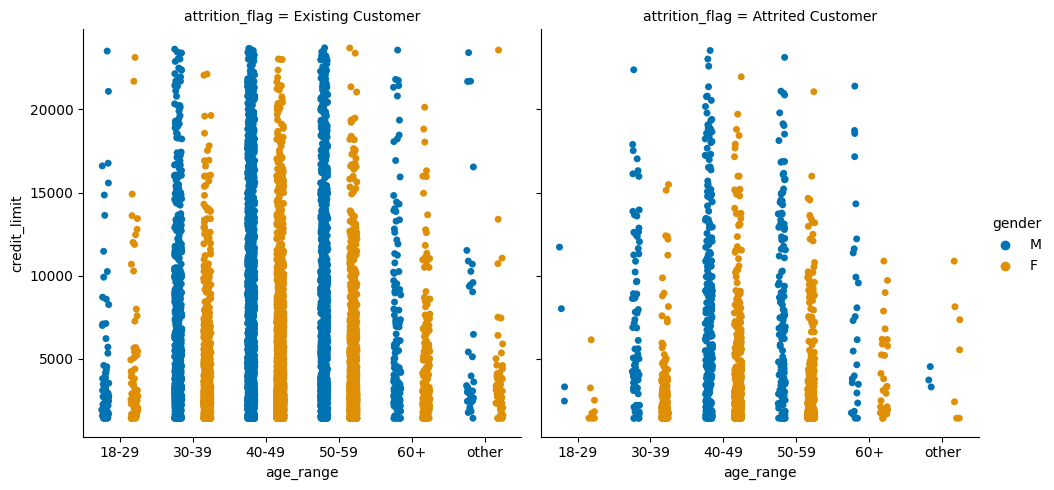

In [259]:
#Let's compare existing to churned customers when looking at age ranges and credit limits
sns.catplot(data = df_merge, y='credit_limit', x='age_range', hue = 'gender', col = 'attrition_flag', order = ['18-29','30-39','40-49','50-59','60+','other'],palette=main_color,dodge=True, alpha=1);

##  Here we can see that Men, age 40-60, are most likely to churn. Higher churn rates are also related to lower credit limits. Seeing this, I wondered what types of cards our churned clients were holding.

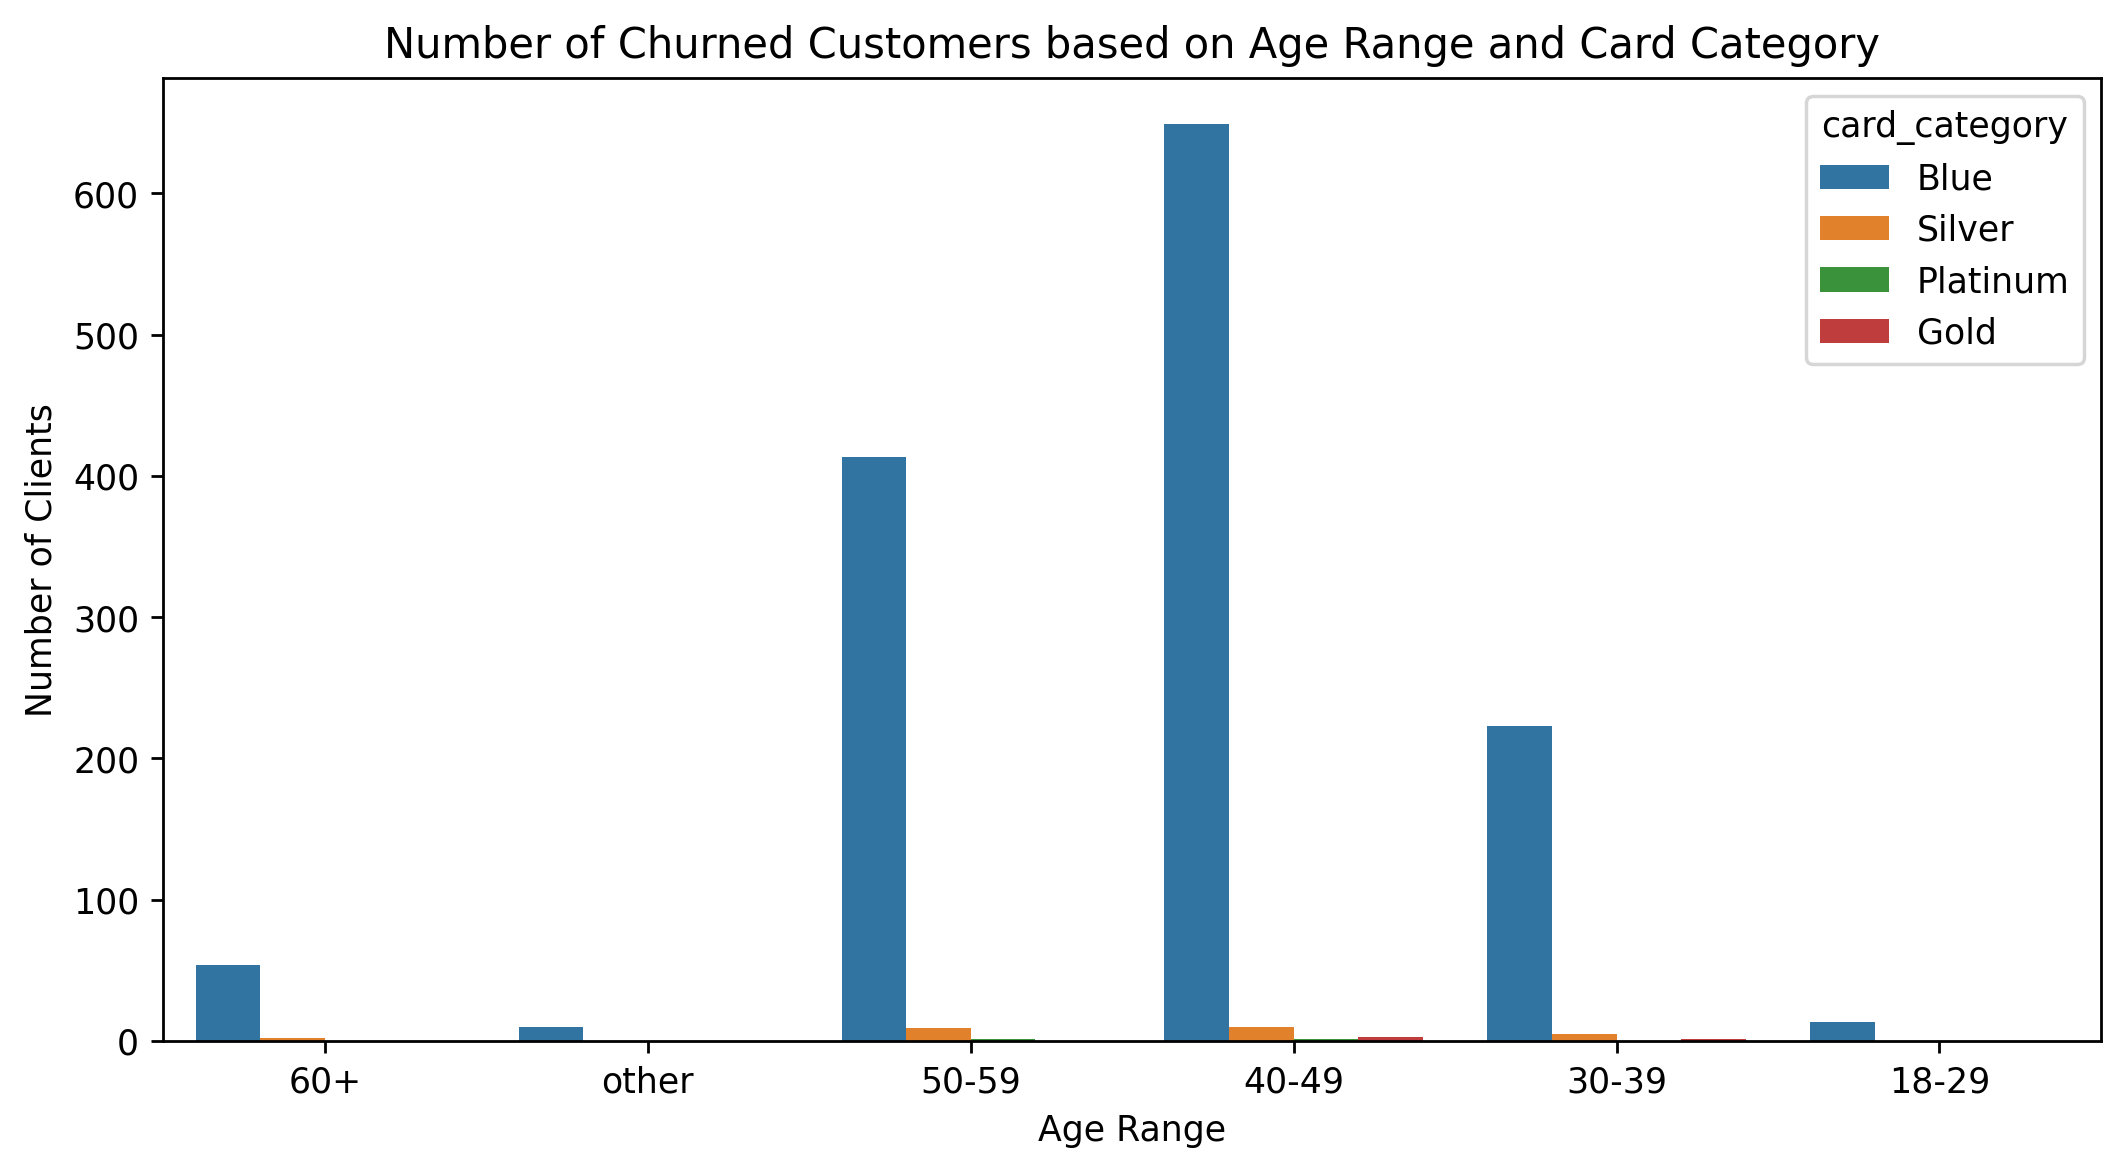

In [288]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi=250)
sns.countplot(data = churned_cust, x = 'age_range', hue = 'card_category')
plt.title('Number of Churned Customers based on Age Range and Card Category')
plt.xlabel('Age Range')
plt.ylabel('Number of Clients');

## Among the churned customers, the vast majority of them held blue cards. This raised another question: Does the card category relate to credit limit at all?

In [81]:

sns.catplot(data = df_merge, y = 'credit_limit', x='age_range', hue='card_category', col = 'attrition_flag', dodge=True, jitter = 0.5 );

## Looking at this comparison between credit limits and card categories between existing and churned customers, it does reveal that the bulk of churned customers lie within the 40-60 age range and also posess the Blue card. Given the low churn rate of silver, gold, and platinum card holders, even at lower credit limits, this may be something worth looking into. Pherhaps card holders with a higher ranking card are less likely to churn.

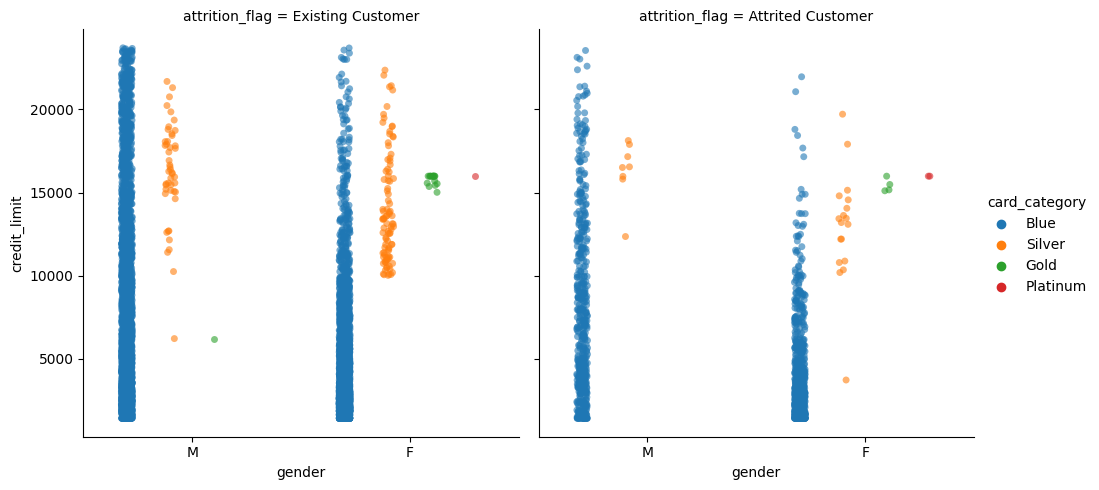

In [88]:
sns.catplot(data = df_merge, y = 'credit_limit', x='gender', hue='card_category', col = 'attrition_flag', dodge=True, alpha=0.6);

## A further look into this shows that most silver card holders tend to have a credit limit above $10,000, with Female clients much more likely to have cards above the Blue category. We can also see again that most churned customers are blue card holders with lower credit limits. It seems that the lower a clients credit limit, the more likely they are to churn.

## This raised again another question: What criteria relates to getting a higher credit limit/card category?

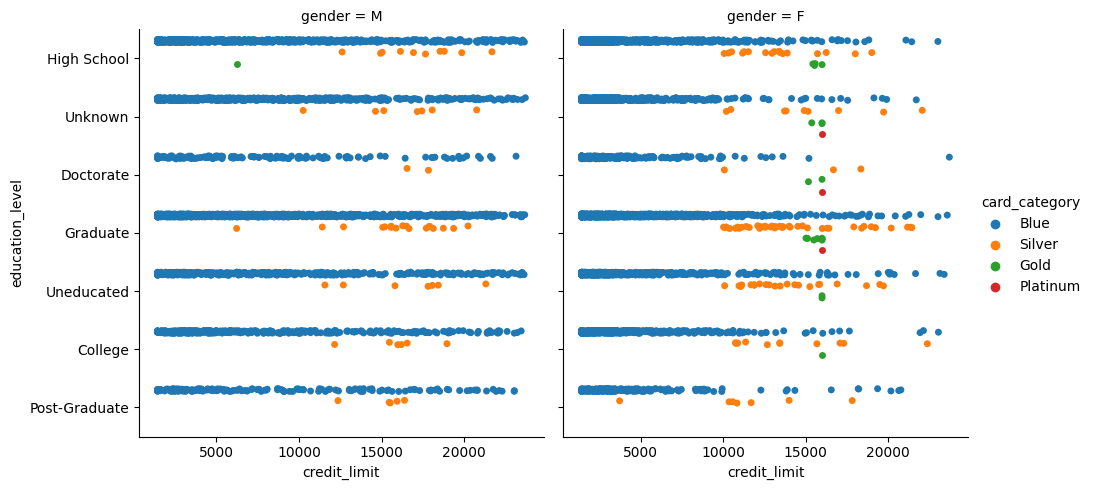

In [136]:
#First, Let's have a look at credit limits and card types based on education level and gender
sns.catplot(data=df_merge, x='credit_limit', y='education_level', hue='card_category', col='gender', dodge=True);


## Here it does look like having a Graduate level education can correlate to a higher card status, as well as credit limit, but the education level overall doesn't seem to have a huge impact on these factors. It is interesting to see that Men, even with most card holders having a blue card, have on average a higher credit limit than Women, with many more clients holding limits above $20,000

## 

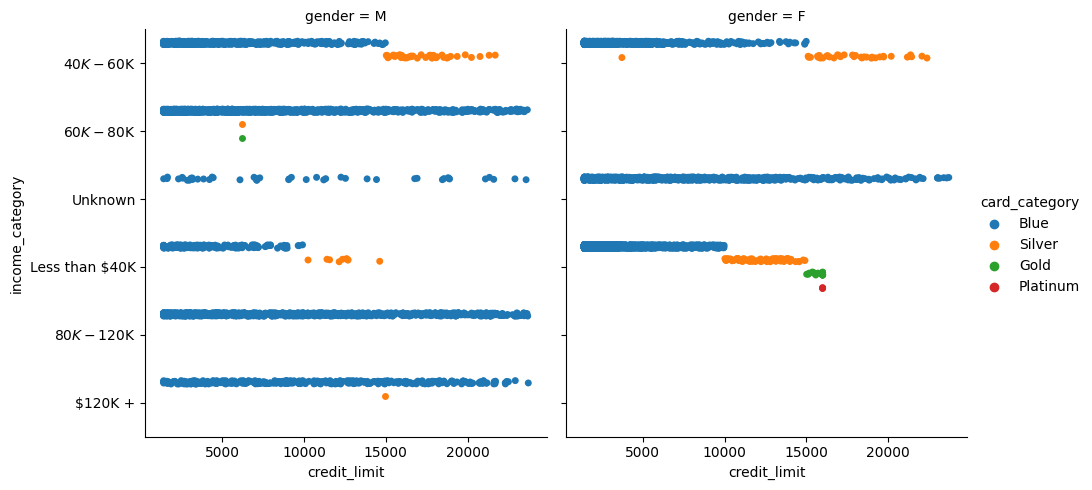

In [135]:
sns.catplot(data=df_merge, x='credit_limit', y='income_category', hue='card_category', col='gender', dodge=True);

## This visual reveals some interesting data. Even with there being more women clients than men, a large quantity of women did not list their income category. This does create some ambiguity in the data, but not enough to cause real issue. It would be helpful to have this information for a more thorough analysis, however.

## More interesting still is seeing the number of silver card holders below $60K, and the lack of silver( or greater) cardholders in higher income ranges. This brings me to another question: Are clients in a certain income range more likely to churn?

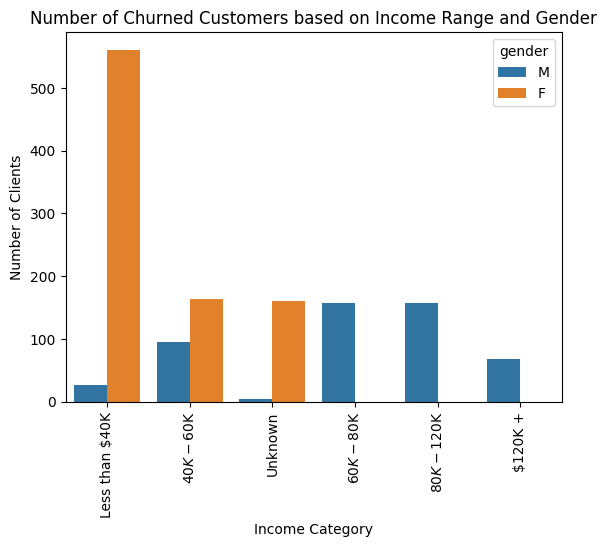

In [289]:
#Let's have a look at the amount of churned customers based on income range and gender
sns.countplot(data=churned_cust, x='income_category', hue='gender', hue_order= ['M','F'], order = churned_cust['income_category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Churned Customers based on Income Range and Gender')
plt.xlabel('Income Category')
plt.ylabel('Number of Clients');

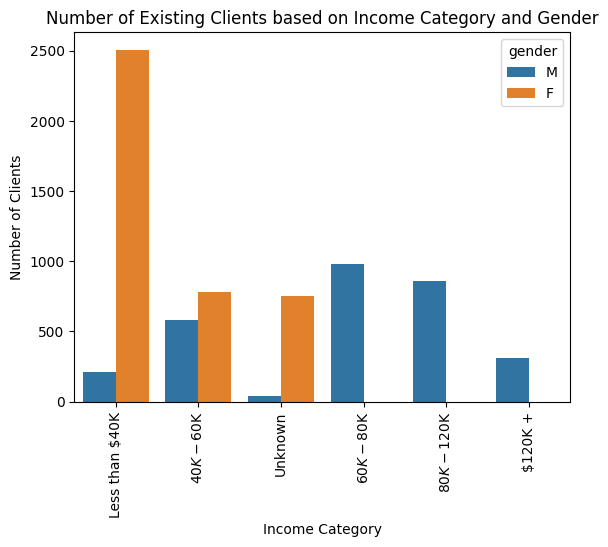

In [290]:
#Now a look at existing customers based on the same parameters
sns.countplot(data=existing_cust, x='income_category', hue='gender', order = churned_cust['income_category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Existing Clients based on Income Category and Gender')
plt.xlabel('Income Category')
plt.ylabel('Number of Clients');

## Nothing surprising here. Most of the clients land in the 'less than 40K' income category, so it would make sense that most churned customers come from the same category.

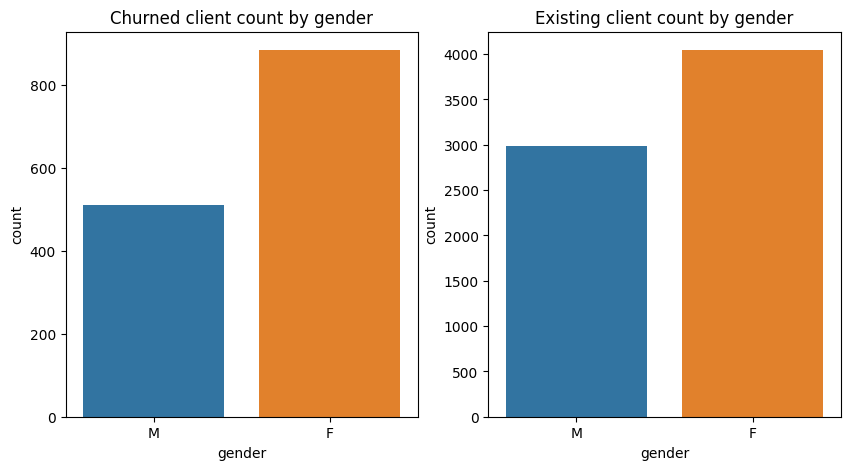

In [137]:
#Out of curiosity, and for reference, I wanted to see the number of churned vs existing clients based on gender
fig,axes = plt.subplots(nrows=1,ncols= 2, figsize=(10,5))
sns.countplot(ax=axes[0],data= churned_cust, x='gender', order=['M','F']);
sns.countplot(ax=axes[1], data= existing_cust, x='gender', order=['M','F'])
axes[0].set_title('Churned client count by gender')
axes[1].set_title('Existing client count by gender');

**Having more female clients churn than men also makes sense with the larger number of female clients, but it seems as though female clients have a higher average churn rate**

In [129]:
#create seperate dataframes for men and women, specifically
df_women = df_merge.loc[df_merge['gender']=='F']
df_men = df_merge.loc[df_merge['gender']=='M']

In [133]:
print('The average churn rate for women: ' + str(df_women['churn'].mean().round(2)*100))
print('The average churn rate for men: ' + str(df_men['churn'].mean().round(2)*100))

The average churn rate for women: 18.0
The average churn rate for men: 15.0


**Here we do find that women have a higher average churn rate at 18%, compared to men at 15%**

In [212]:
df_women.groupby('income_category')['churn'].mean().round(2)*100

income_category
$40K - $60K       17.0
Less than $40K    18.0
Unknown           17.0
Name: churn, dtype: float64

In [213]:
df_men.groupby('income_category')['churn'].mean().round(2)*100

income_category
$120K +           18.0
$40K - $60K       14.0
$60K - $80K       14.0
$80K - $120K      15.0
Less than $40K    11.0
Unknown           11.0
Name: churn, dtype: float64

## interestingly, there is a big difference between the churn rates of men and women specifically within the 'less than 40K' income category, with men averaging a churn rate of 11% and women 18%.

In [214]:
df_women.groupby('age_range')['churn'].mean().round(2)*100

age_range
18-29    11.0
30-39    17.0
40-49    19.0
50-59    19.0
60+      15.0
other    11.0
Name: churn, dtype: float64

In [215]:
df_men.groupby('age_range')['churn'].mean().round(2)*100

age_range
18-29     5.0
30-39    13.0
40-49    16.0
50-59    14.0
60+      15.0
other     8.0
Name: churn, dtype: float64

### Comparing age ranges, we see that women between the ages of 40-60 are holding an average churn rate of %19, compared to men at about 15%. I'm curious to see what the average credit limit is for men and women in these age ranges.

In [216]:
df_women.groupby('age_range')['credit_limit'].mean().round(2)

age_range
18-29    4504.12
30-39    4058.78
40-49    4484.85
50-59    4098.69
60+      4724.64
other    4198.84
Name: credit_limit, dtype: float64

In [217]:
df_men.groupby('age_range')['credit_limit'].mean().round(2)

age_range
18-29    4908.43
30-39    7326.15
40-49    8695.12
50-59    8406.96
60+      6508.83
other    6589.79
Name: credit_limit, dtype: float64

### Here we can see a noticeable difference in average credit limits, with men averaging a much higher credit limit over the women. 

## Summary: Given my analysis above, it is clear that women, across multiple factors, have a much higher churn rate than men. One stand out factor when comparing the two genders is that men, on average, hold much higher credit limits when compared to women across the same age groups. This could be an indication that lower credit limits lead to higher churn rates.

# Data Enrichment

## Following my analysis of the datasets provided, I believe that a more in depth analysis could be provided with further data collection.


## 1. Gathering client postal/zip codes can provide further insight into our data through socio economic demographic data, such as average household incomes, average family size, racial distribution, and area population. I would like to use this data to help determine whether any of these factors play a part in our customer base's churn rates. 


## 2. It would be helpful to have more data on the card categories and the differences between them. Being able to analyze the benefits and different rates between card types could provide insight into why certain customers may be more likely to aquire a certain type of card, and  how that could impact their credit limits, spending, and, in turn, their churn rates.


## 3. Information about the types of bank services that our clients use could be helpful as well. Knowing which customers use online banking, which have more than one account open with us (such as chequing, savings) vs those who simply hold a credit card. I could use this data to find whether more engagement with different bank services has an effect on a customers likeliness to stay with the bank.